# It's my house, and I live here !


## Kaggle Competition for House price : 

### Use Machine Learnings method from Scikit Learn python library to predict price of house. 

#### A. Illustrate dataset with scatter plots, histograms and box plots 
#### B. Defining a pipeline  
#### C. Using different learning models / Tune parameters for each models with randomizedsearch
#### D. Treating outliers, missing data / We create another notebook for Outliers and Residus
#### E. Regularisation : reduce overfitting 
#### F. Select Feature and project features onto Principal components
#### G.  Improve Tree model with Adaboost


###### Introduction : 


##### I found the competition hard, especially manipulation of the data. I had initially the desire to automatize all reasearch with pipeline but I faced problems when incorporationg outliers detection and deletion; so I had to create separate notebook to analyse them. I would be very happy to share and received comments, improvements, errors from readers and machine learners. My objective is to continue to learn more efficient regression models in my path toward Artificial Intelligence.


###### Final score : 0.11897  
###### Rank : 719  


 Sources:
- Naive Ensemble Model (Ridge + Lasso). Kaggle Kernel from Authors: Ronald Macmaster (eid: rpm953) and Javier Zepeda (eid: jtz236)
- "Hands on machine learning with scikit learn and TensorFlow", Aurelien Geron
- edX course "Principles of Machine Learning" / Use of Boosted Trees model
- Gael Pages Multilinear toolkit https://github.com/gimpgael/MultilinearModel_diagnostic/blob/master/test_cook_distance.m
- "La_regression_dans_la_pratique", Ricco Rakotomalala
- Analyse de Donnees : C. CAZES, P.BERTRAND Course from Master de la Modelisation et de la Decision, Paris Dauphine





In [27]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmath

import matplotlib.pylab as pylab
%matplotlib inline

import datetime
from __future__ import division
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [28]:
train = pd.read_csv('train.csv',sep=',')
test = pd.read_csv('test.csv',sep=',')

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [29]:
#import seaborn as sns
import cmath


train = pd.read_csv('train.csv',sep=',')
test = pd.read_csv('test.csv',sep=',')
train.head()

# prep train data
label_col = "SalePrice"
index_col = "Id"
xtest = test.drop([index_col], axis=1)
xtrain = train.drop([index_col, label_col], axis=1)
y = np.log1p(train[label_col])

# all data, combo dataframe
housing = pd.concat([xtrain, xtest])

# A. Illustrate dataset with scatter plots, histograms and box plots 

C:\Users\BQUIDET\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\BQUIDET\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\BQUIDET\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\BQUIDET\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


'Done'

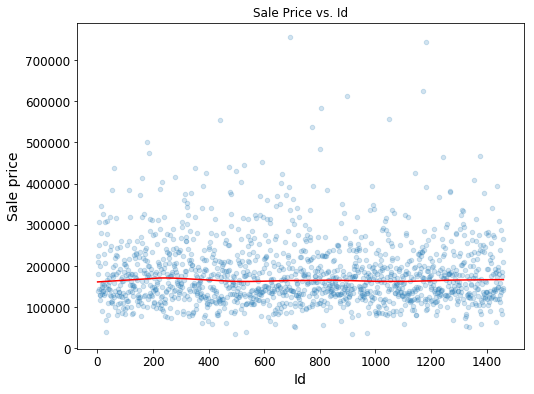

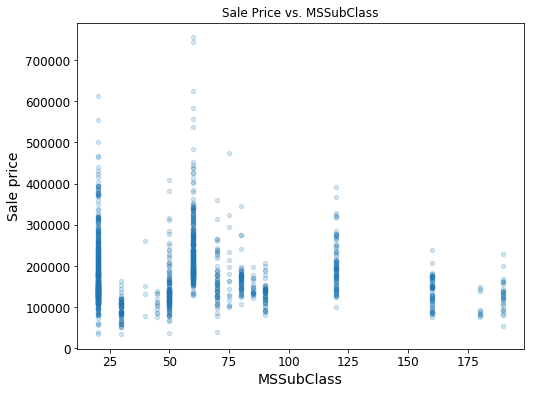

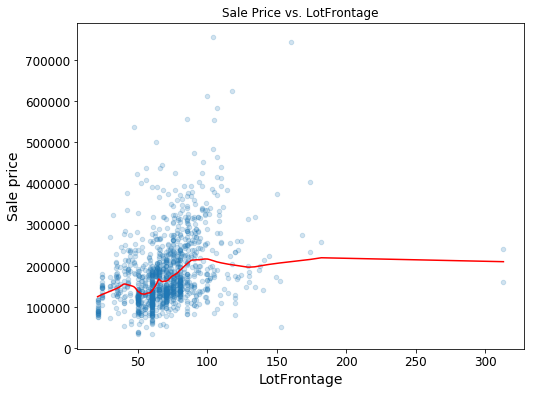

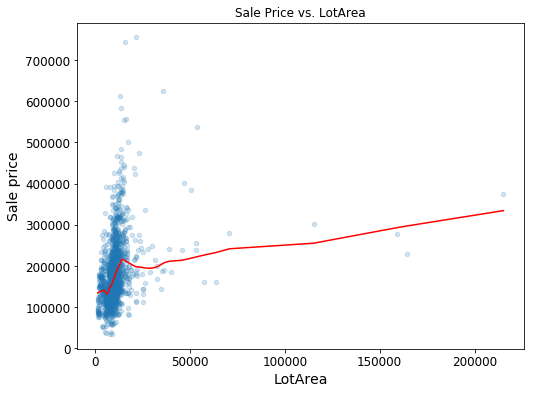

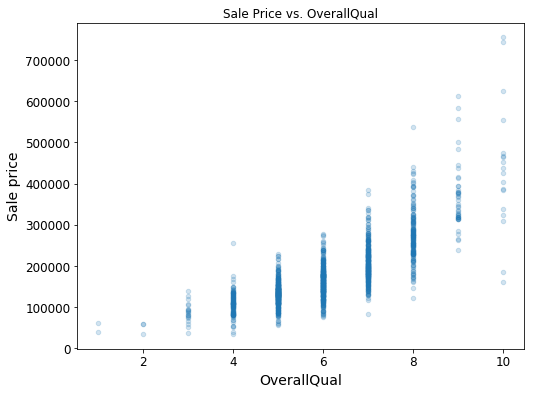

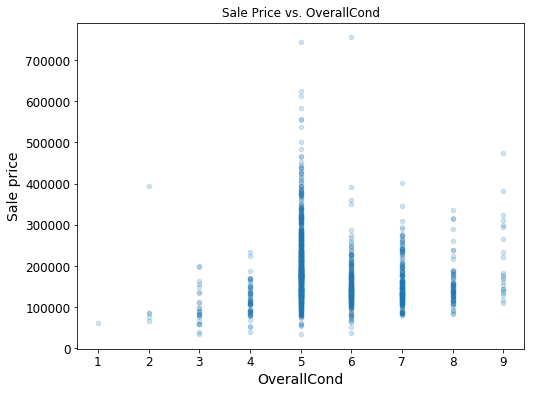

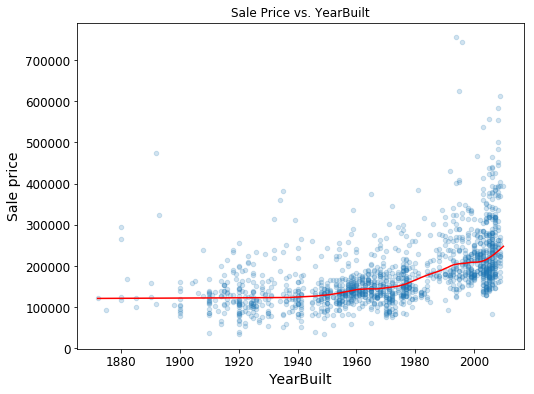

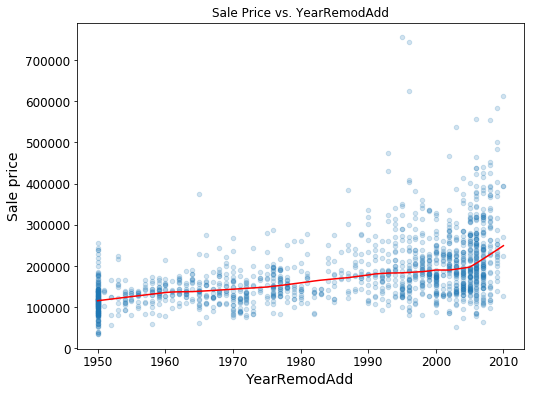

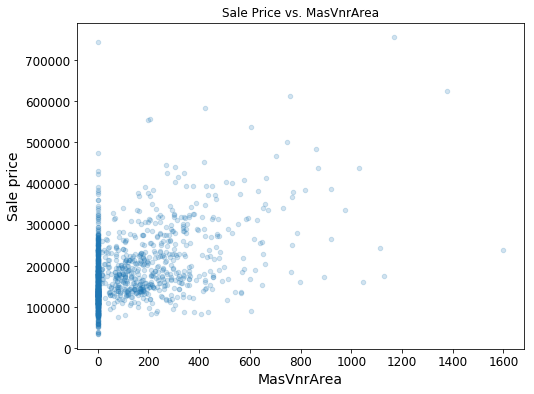

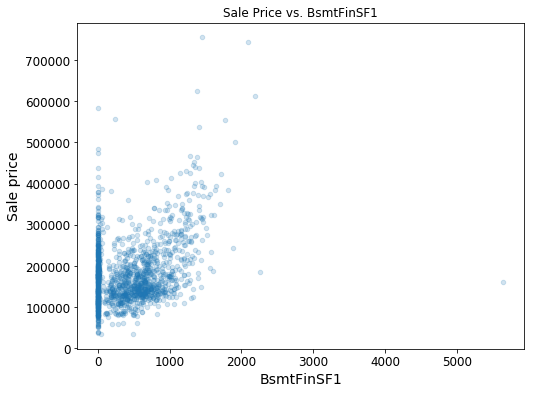

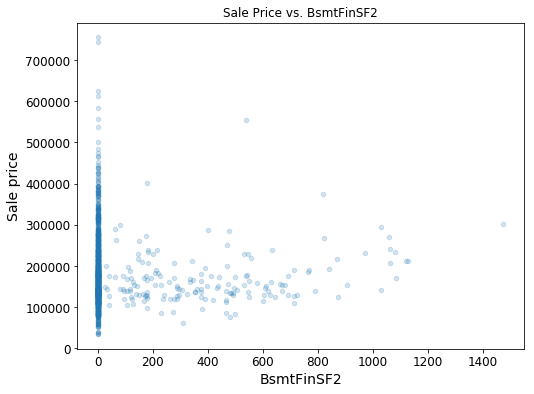

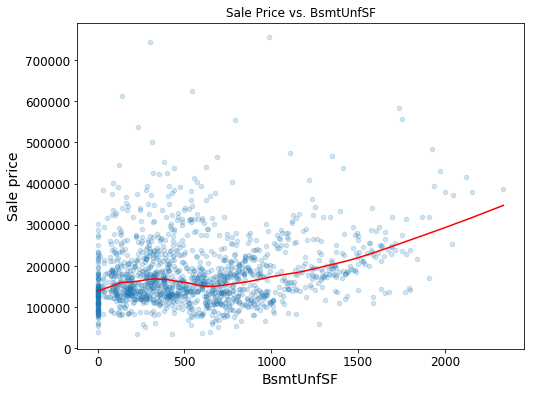

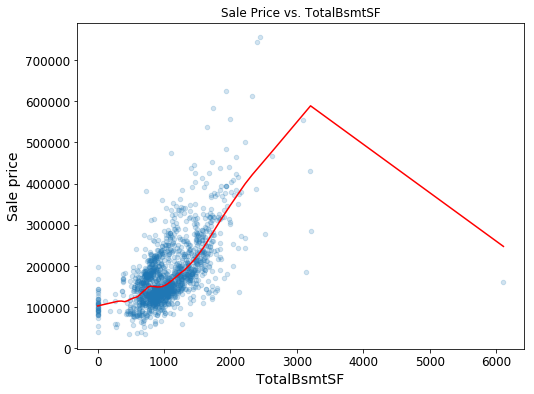

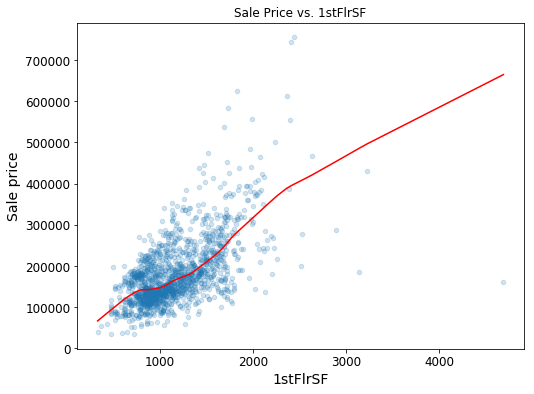

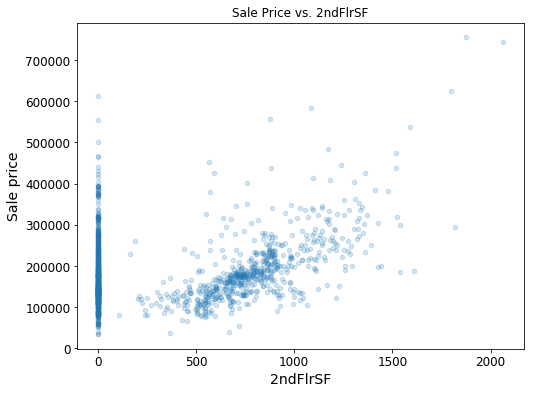

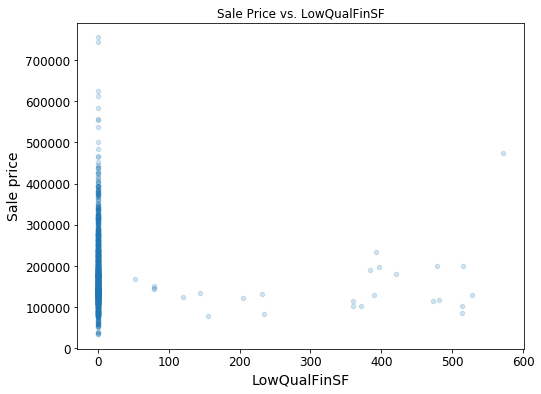

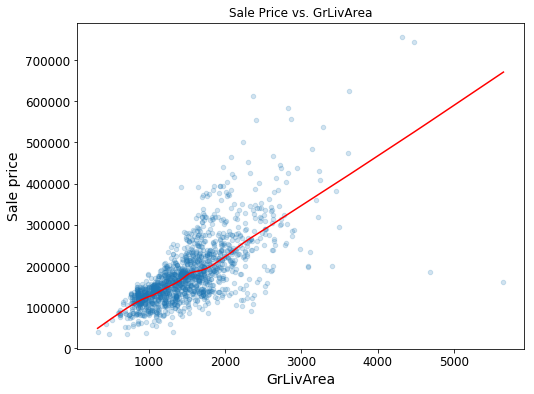

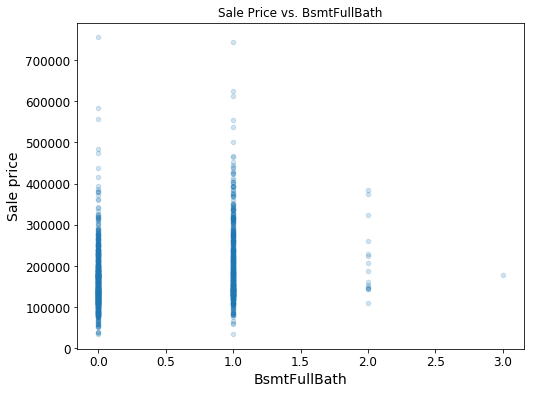

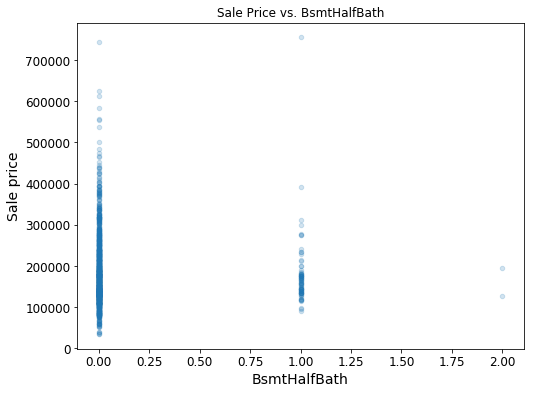

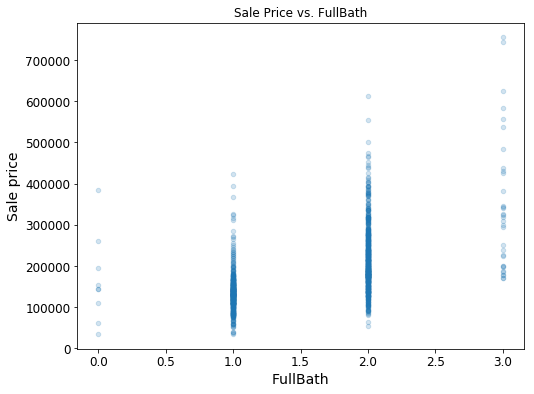

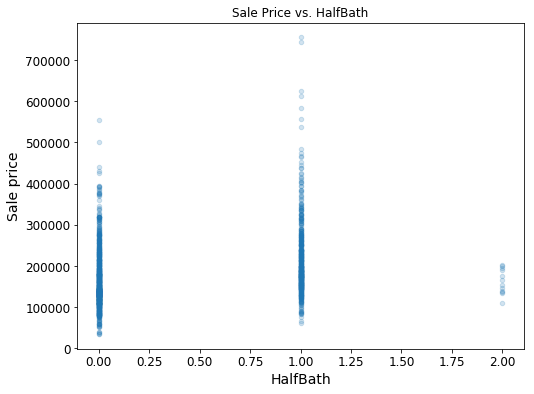

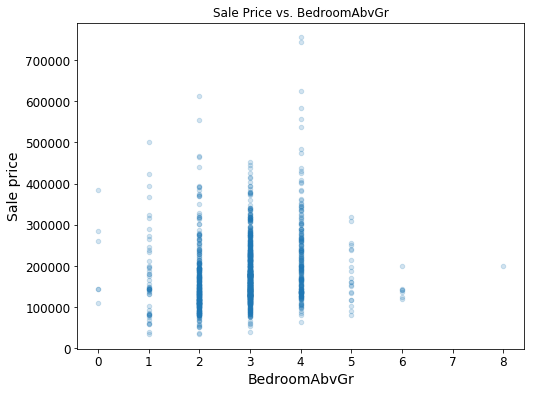

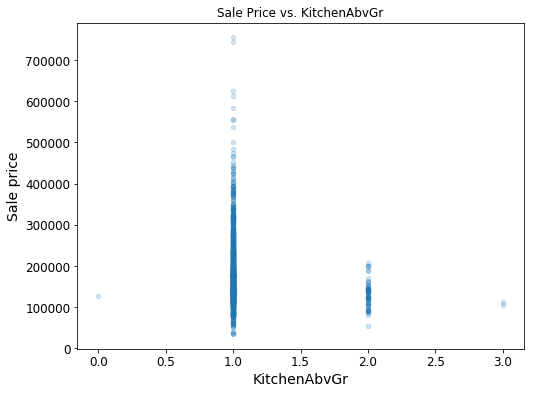

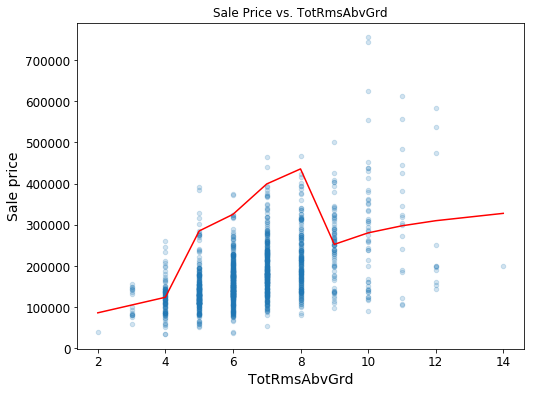

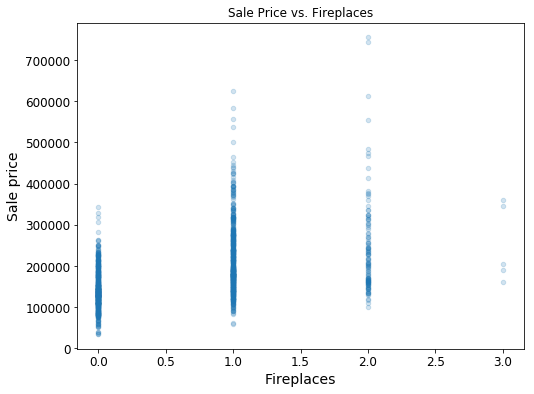

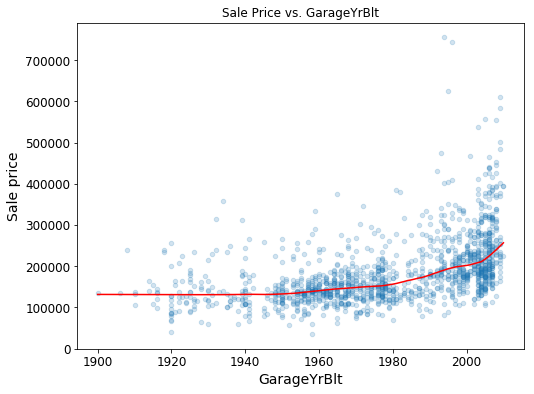

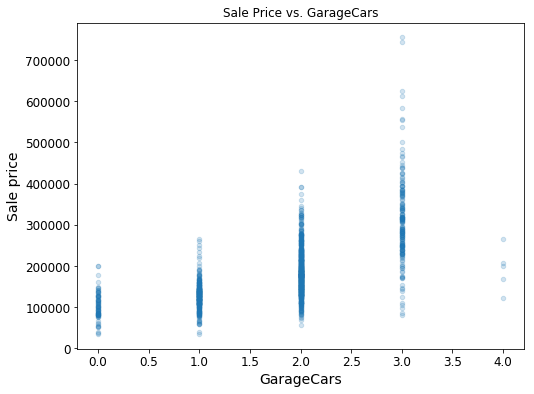

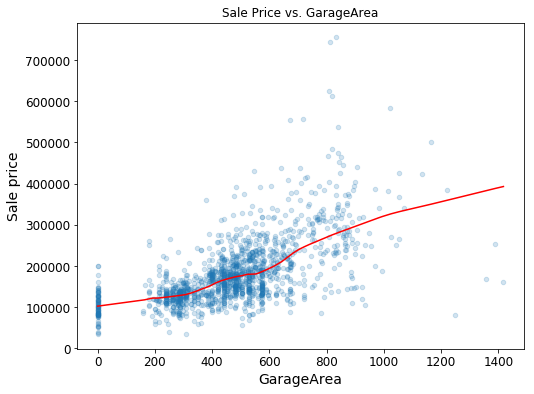

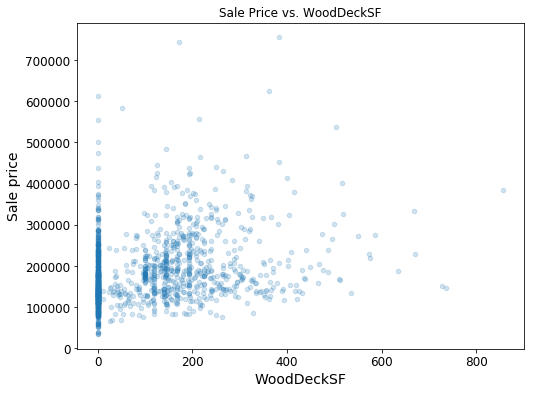

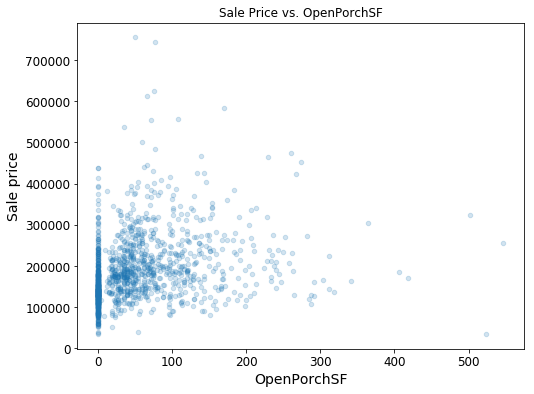

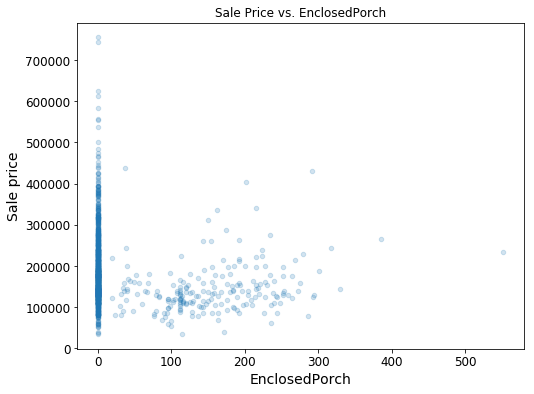

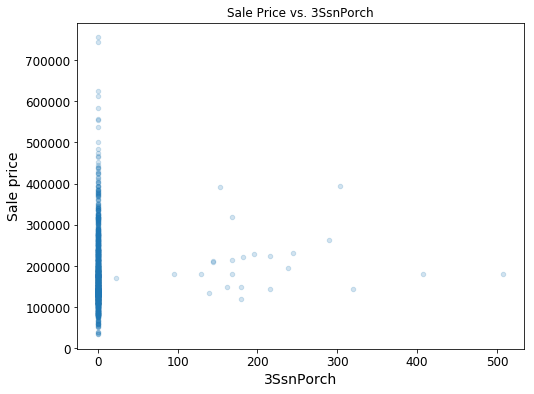

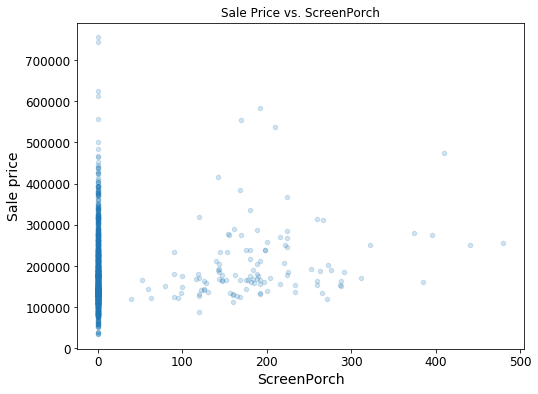

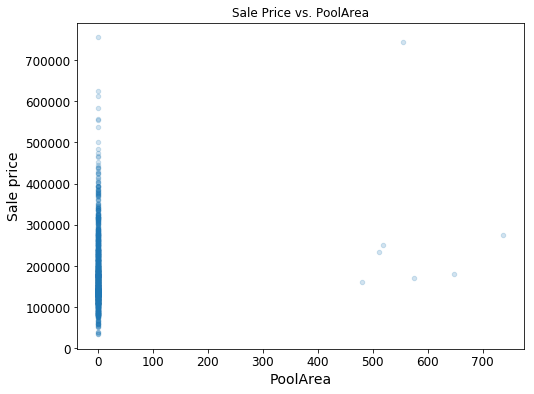

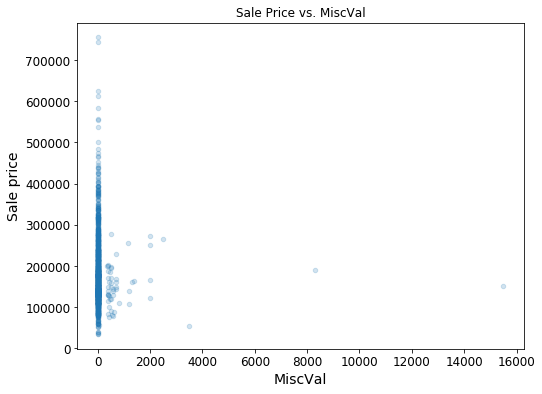

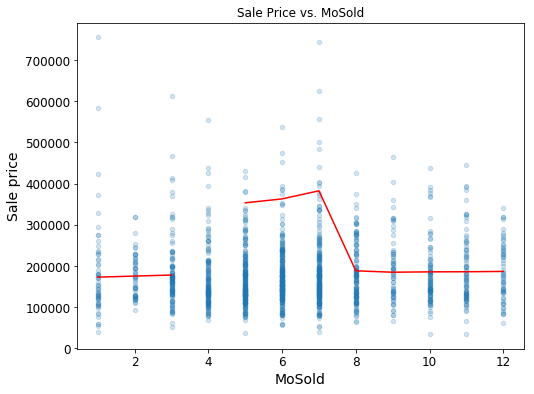

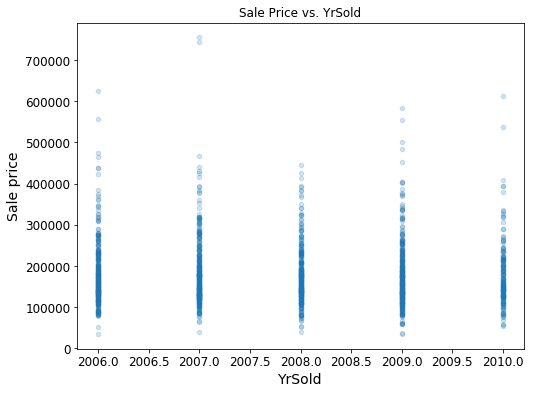

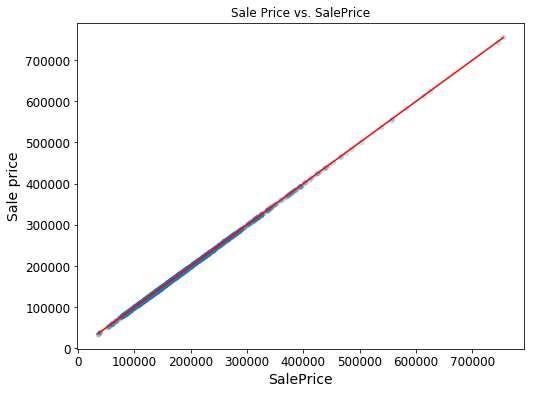

In [39]:
def scatter(df):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    cols = df.columns.tolist()
    ## Loop over the columns and create the scatter plots
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            ## first compute a lowess fit to the data
            los = lw.lowess(df['SalePrice'], df[col], frac = 0.3)

            ## Now make the plots
            fig = plt.figure(figsize=(8, 6))
            fig.clf()
            ax = fig.gca()
            df.plot(kind = 'scatter', x = col, y = 'SalePrice', ax = ax, alpha = 0.2)
            plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
            ax.set_xlabel(col)
            ax.set_ylabel('Sale price')
            ax.set_title('Sale Price vs. ' + col)    
    return 'Done'

%matplotlib inline
#scatter(train, num_cols)
scatter(train)

C:\Users\BQUIDET\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


'Done'

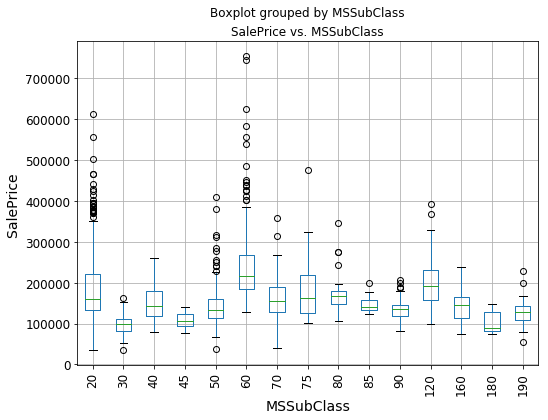

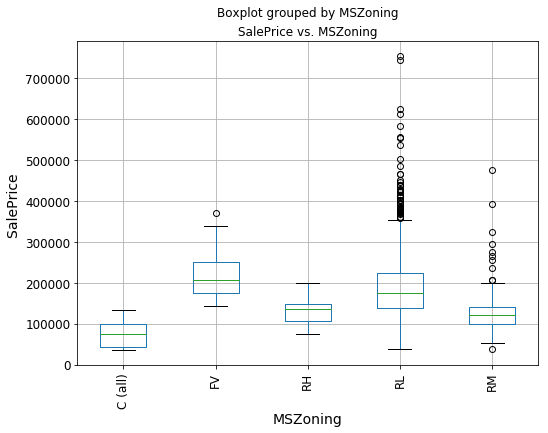

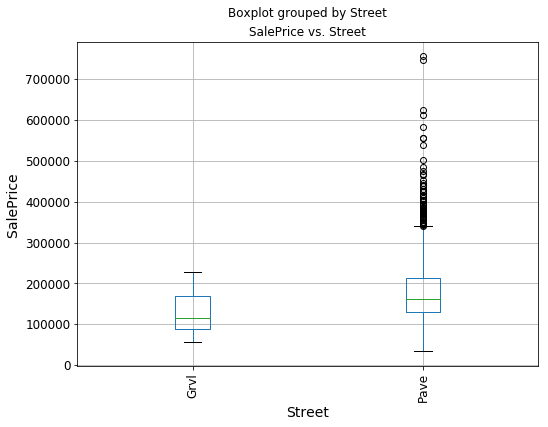

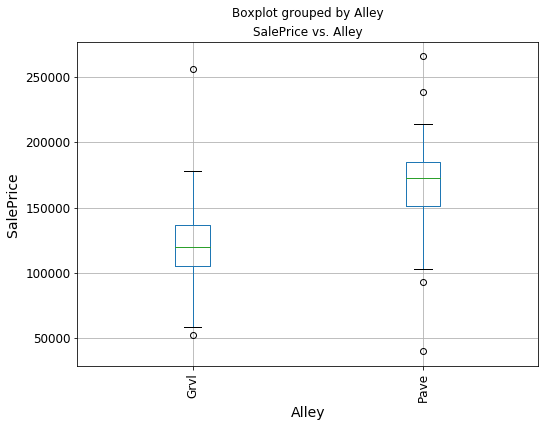

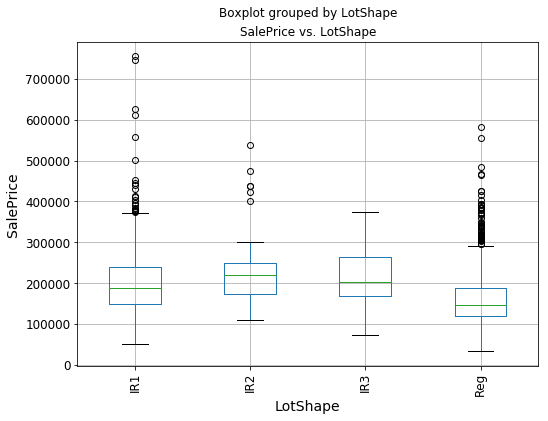

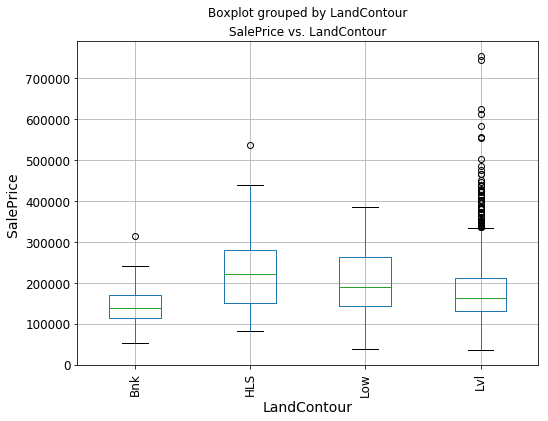

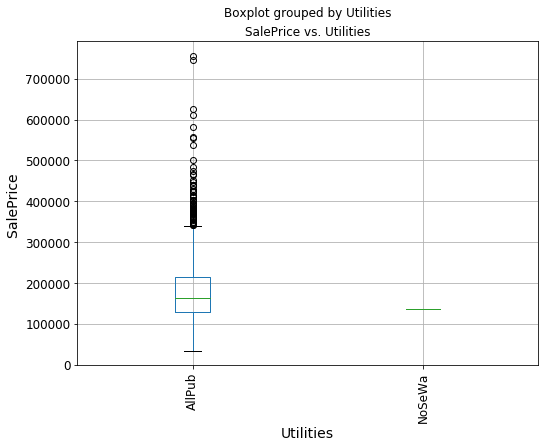

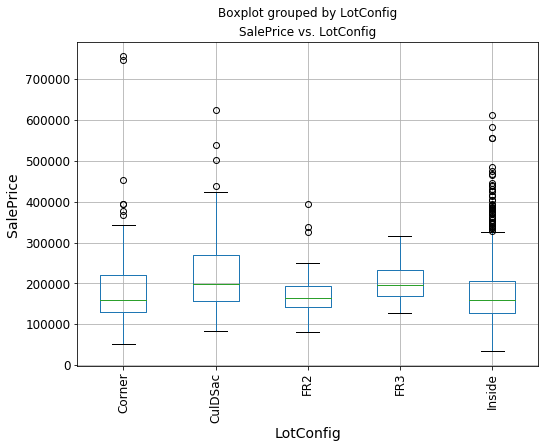

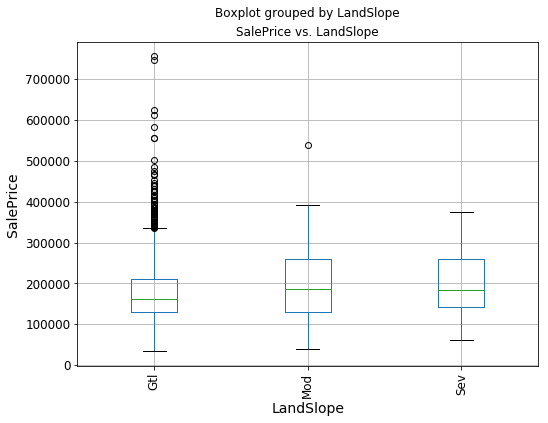

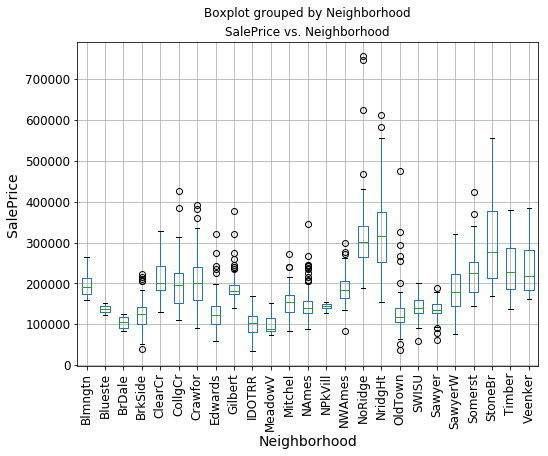

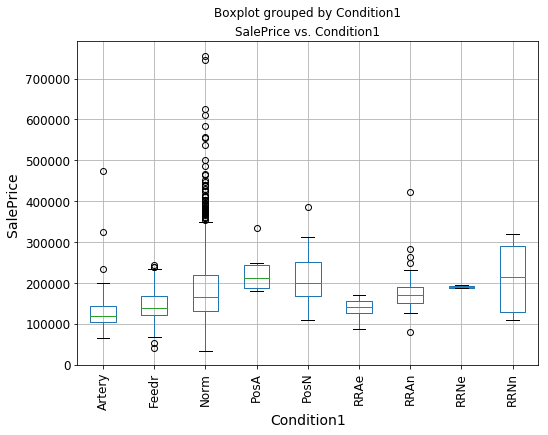

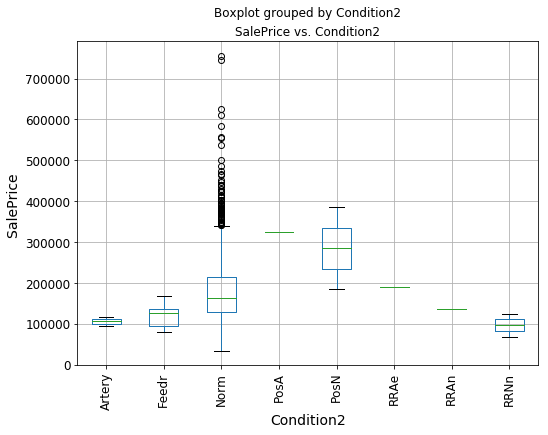

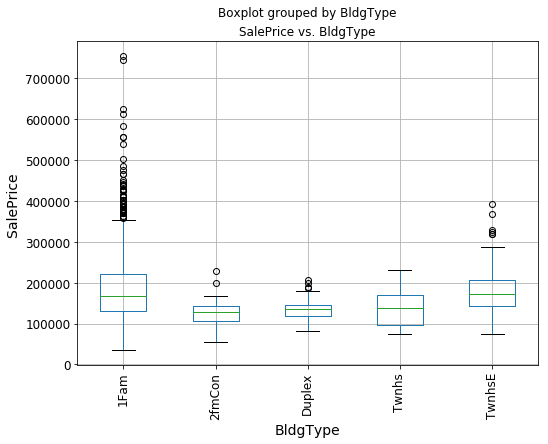

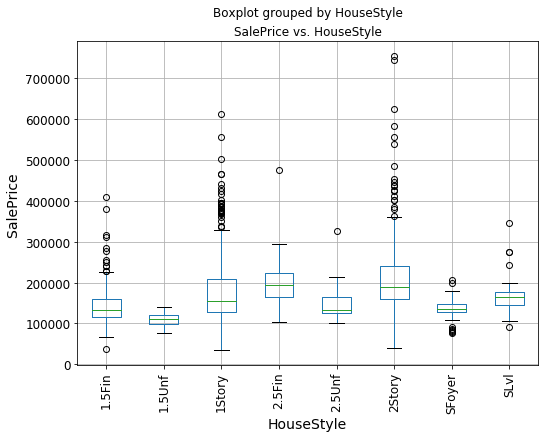

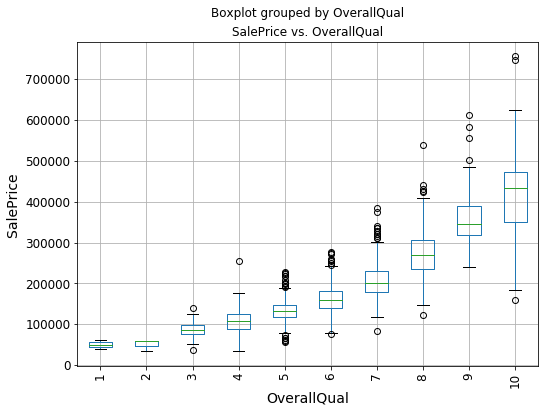

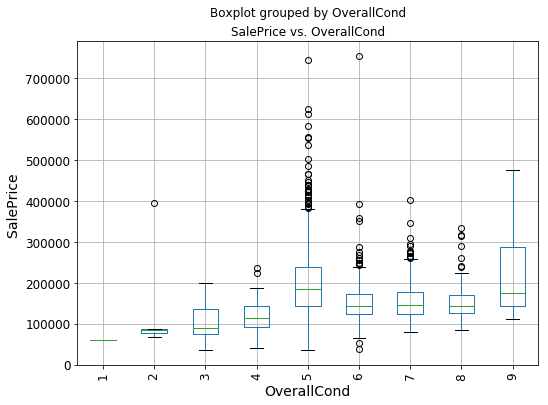

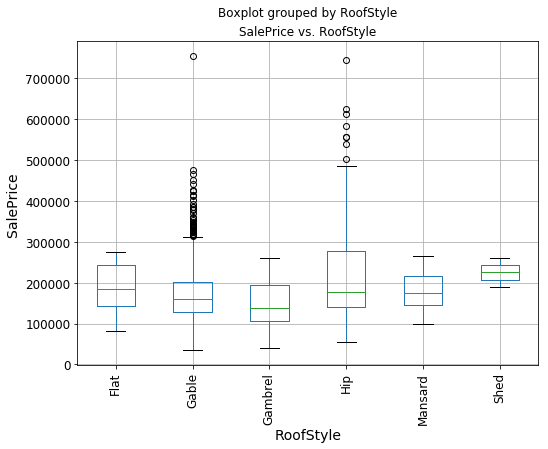

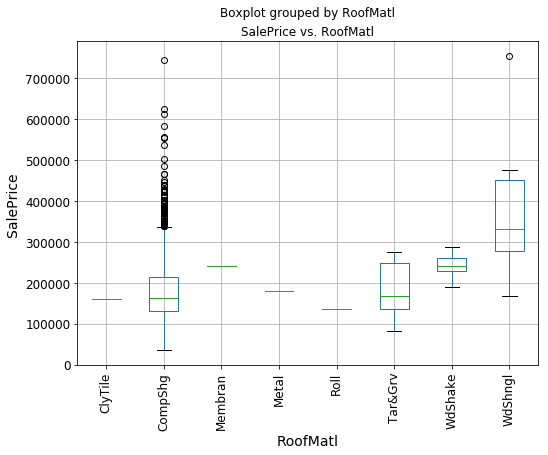

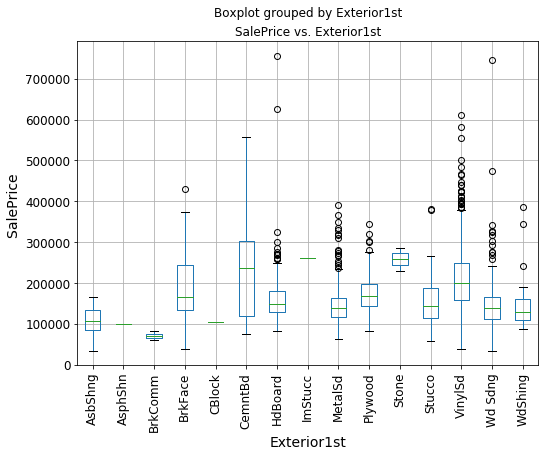

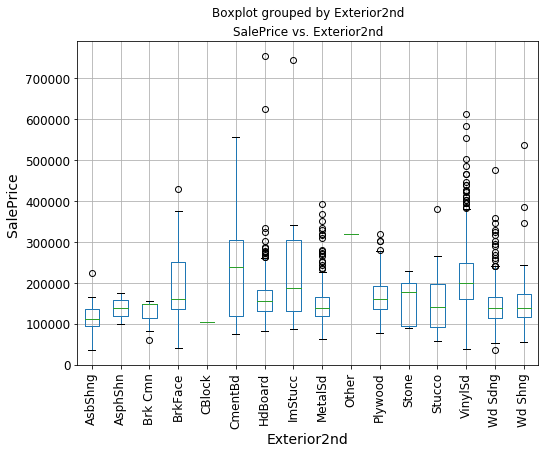

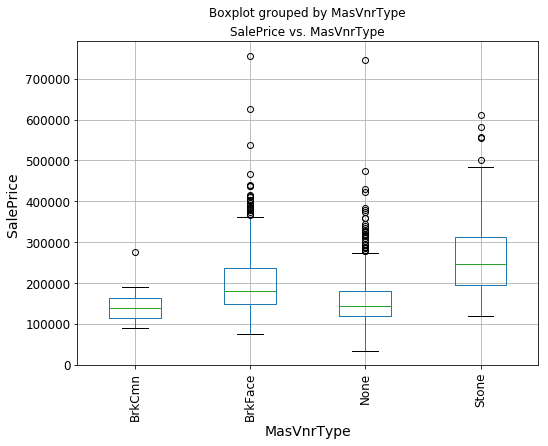

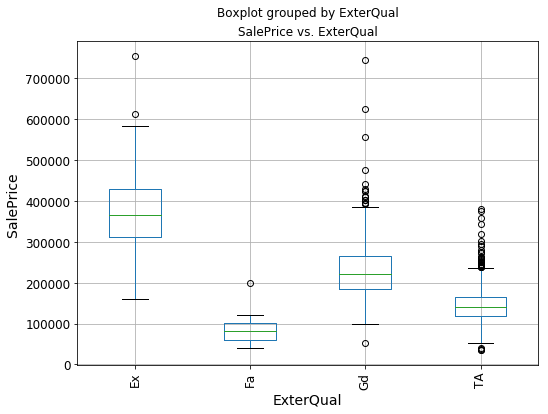

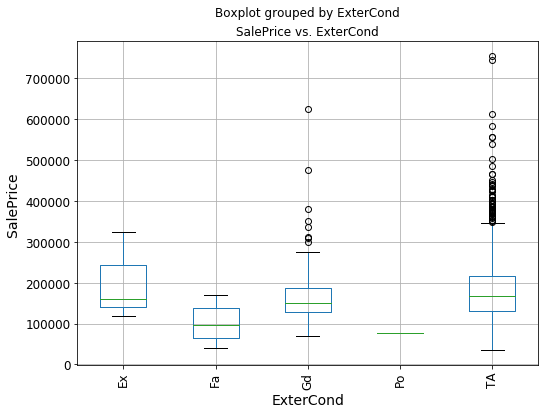

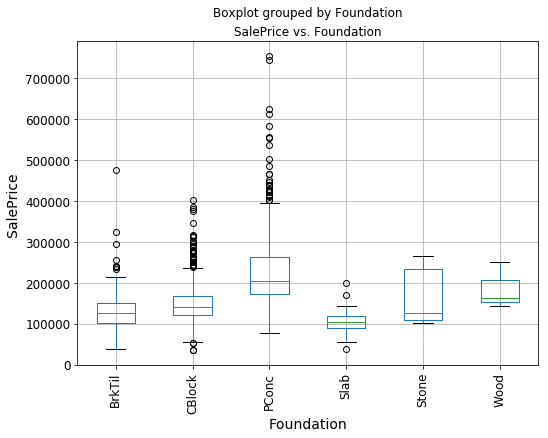

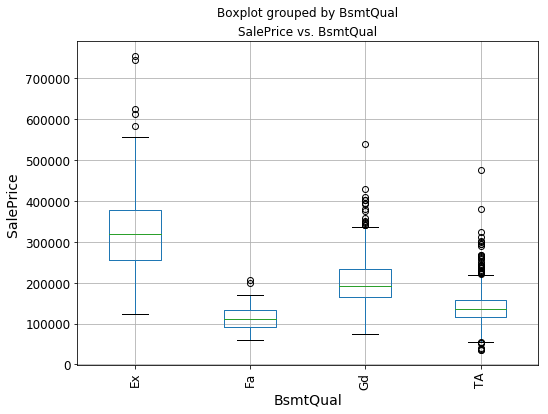

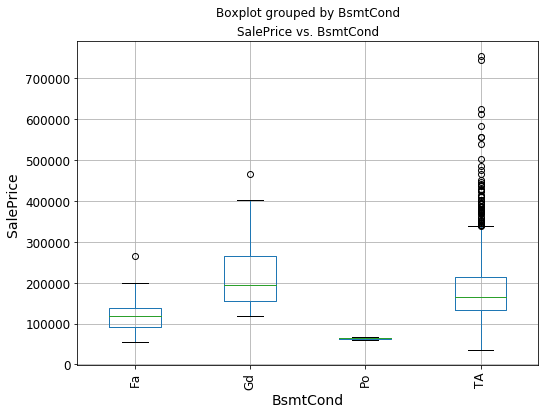

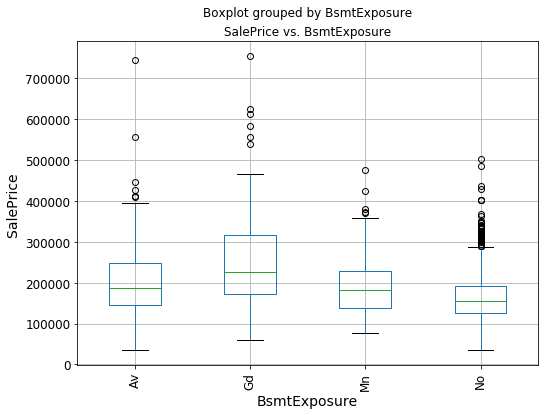

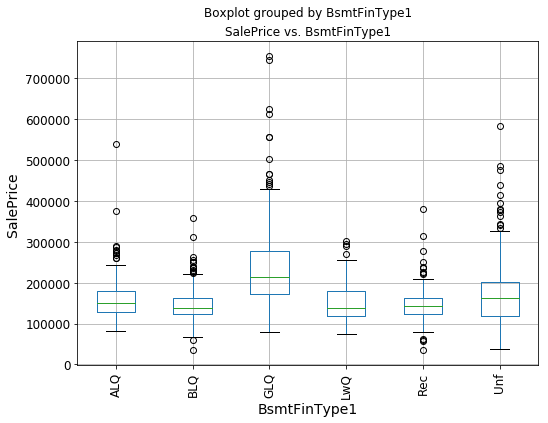

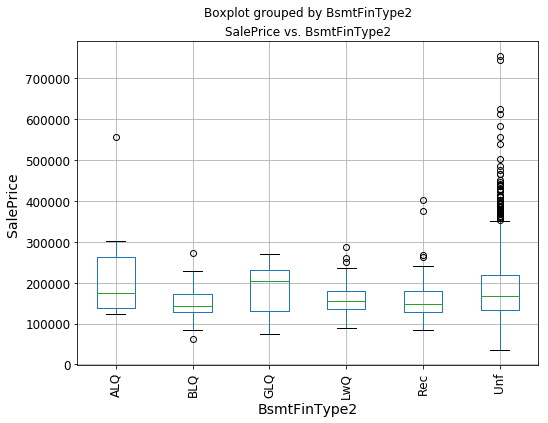

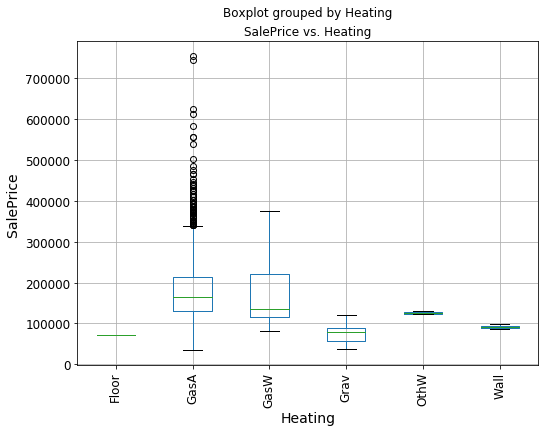

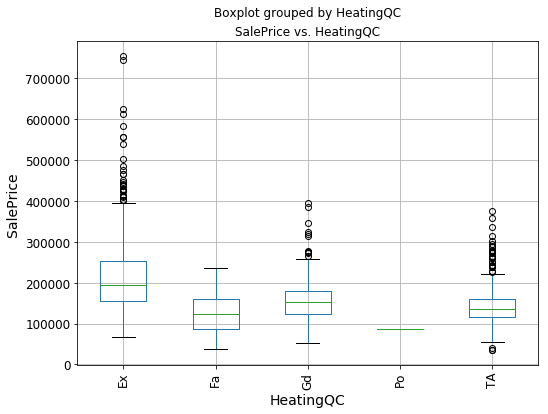

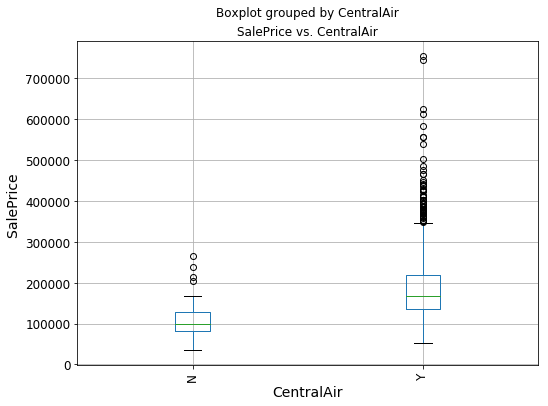

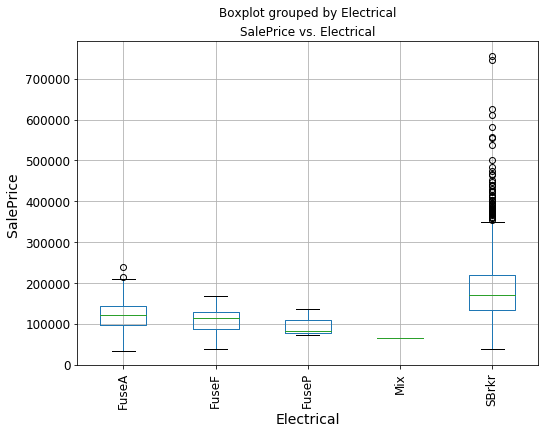

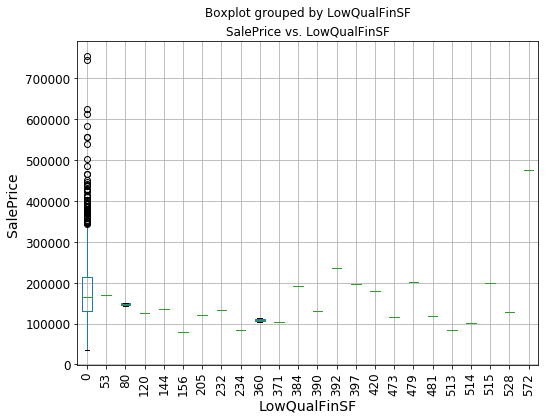

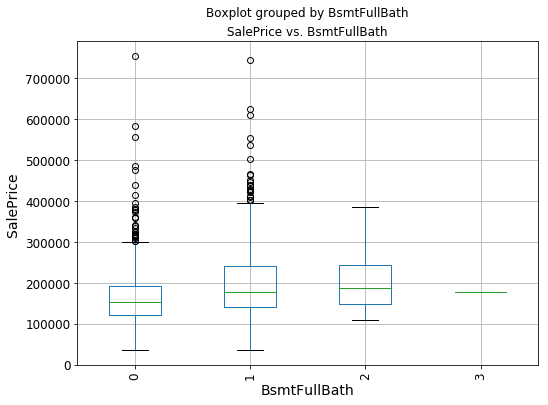

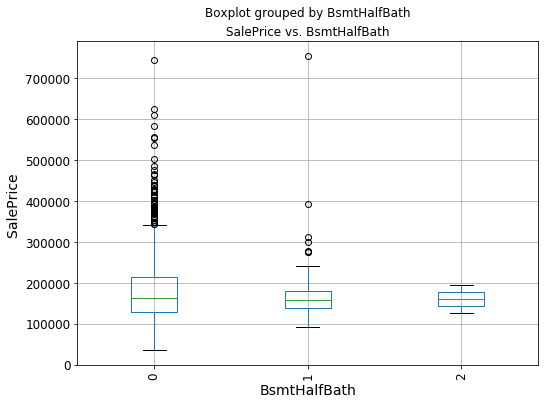

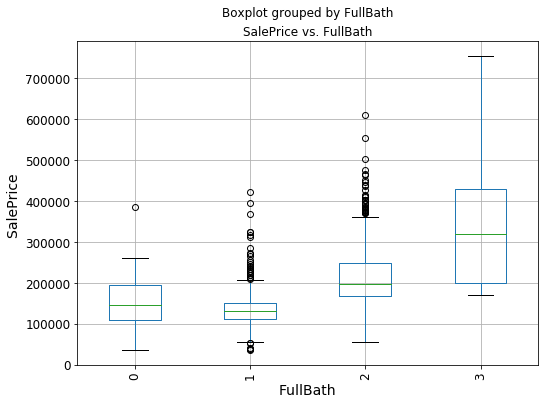

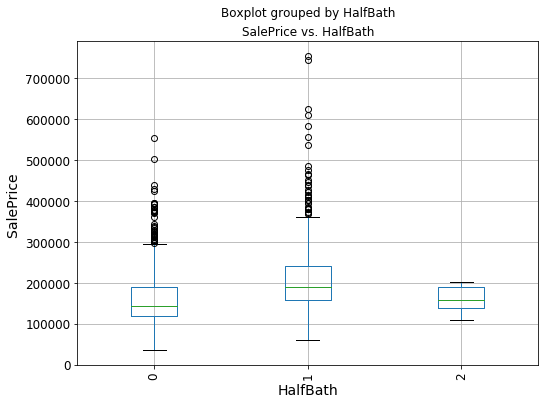

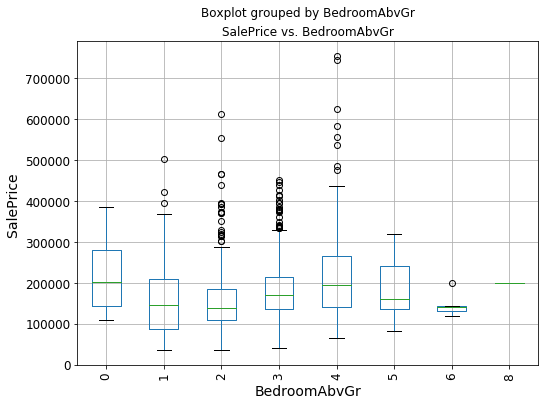

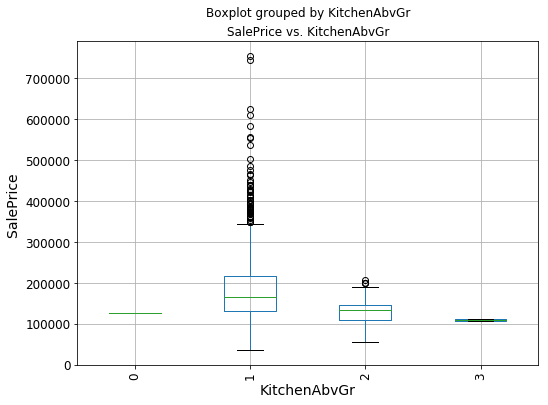

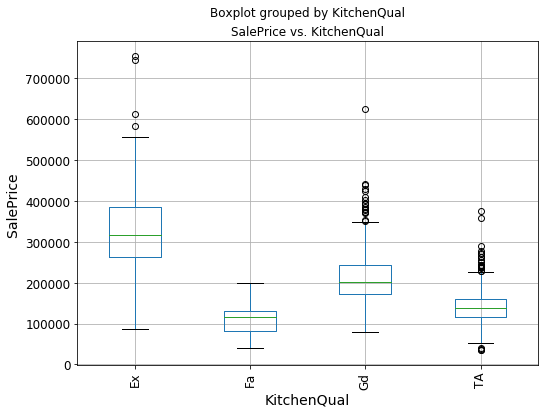

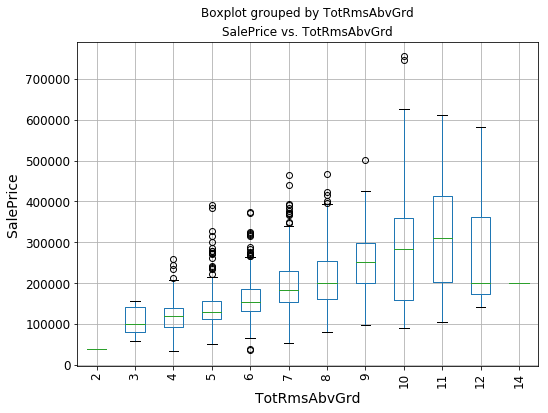

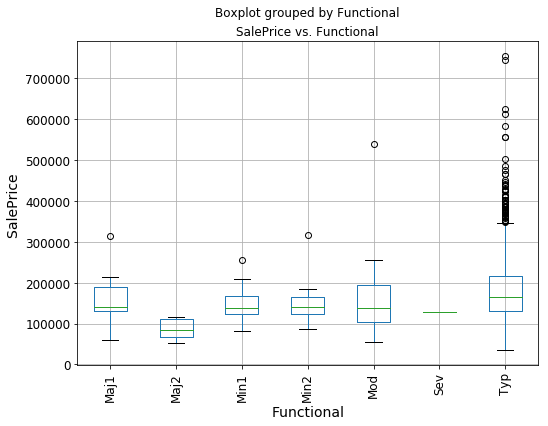

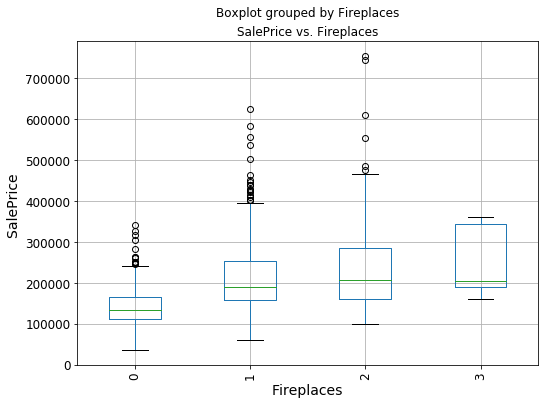

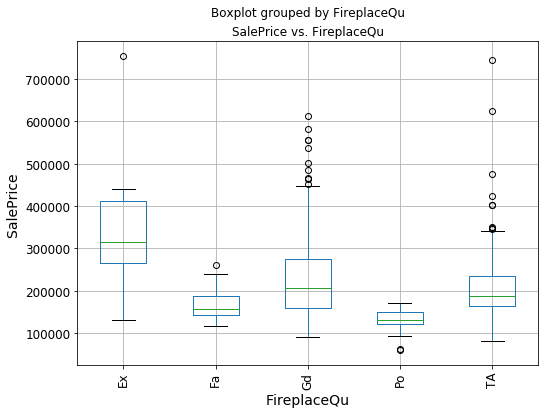

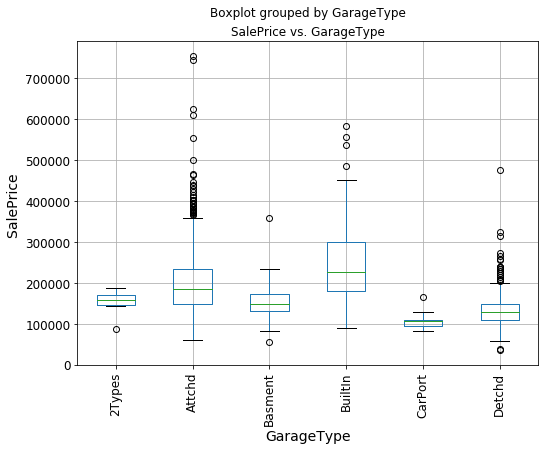

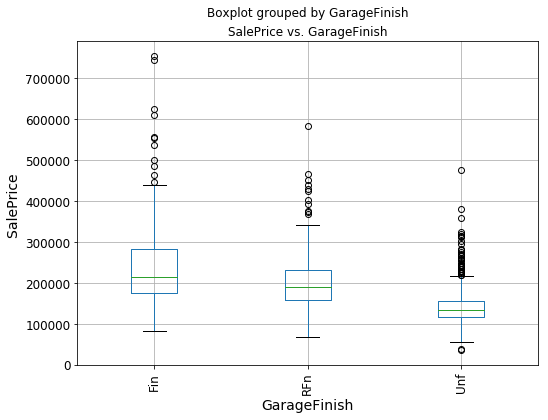

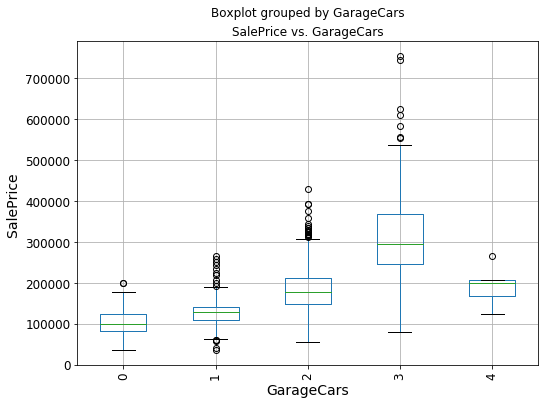

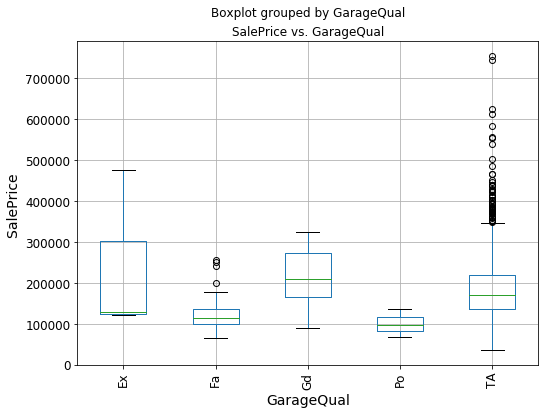

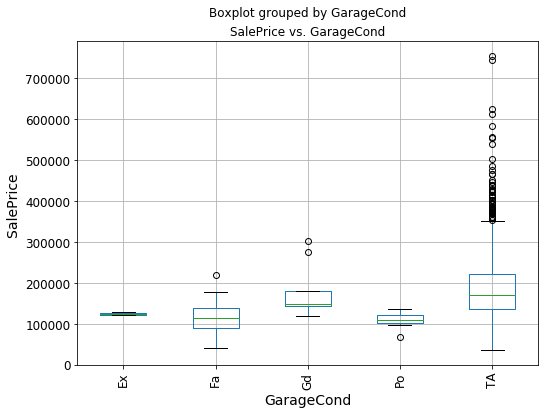

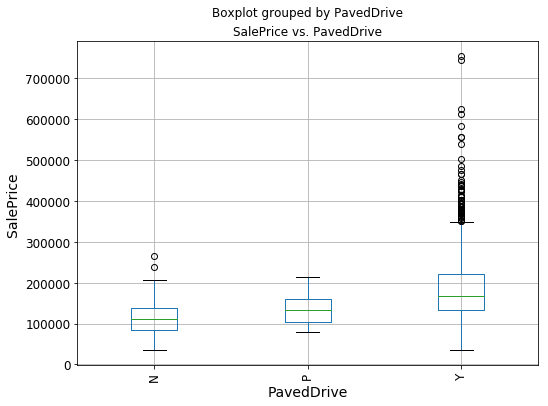

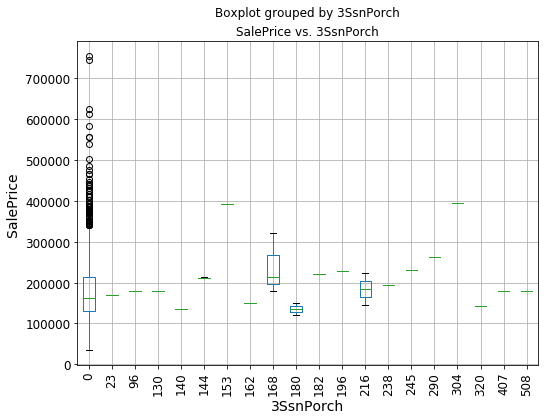

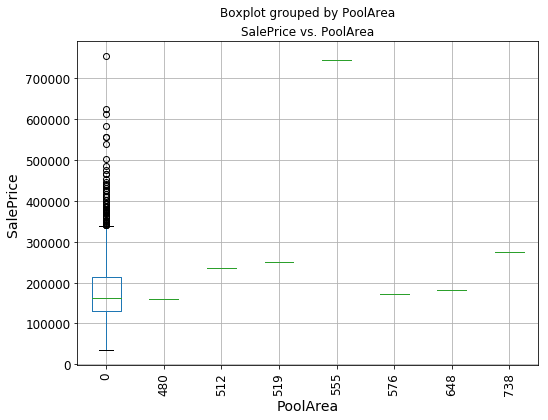

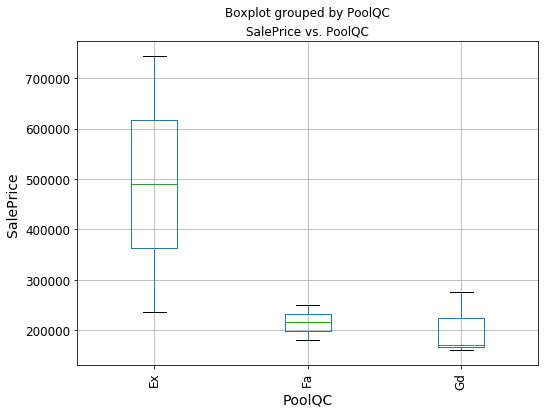

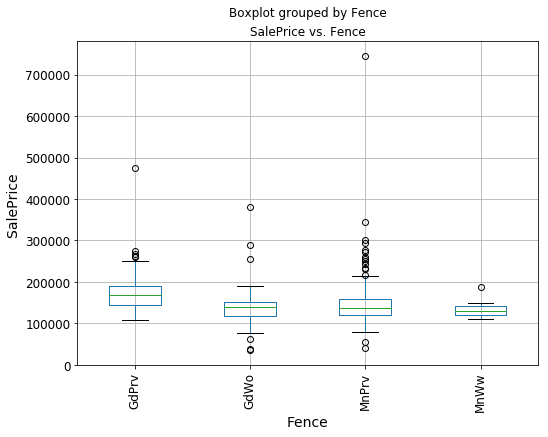

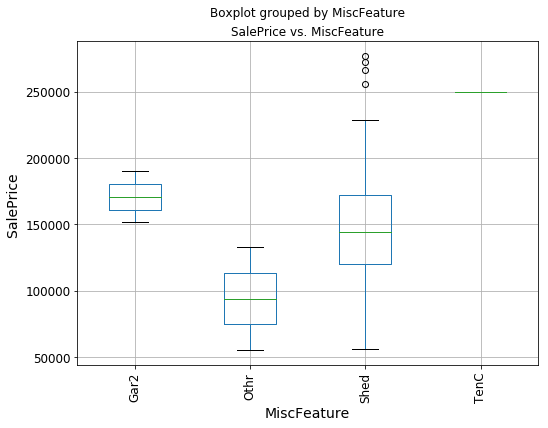

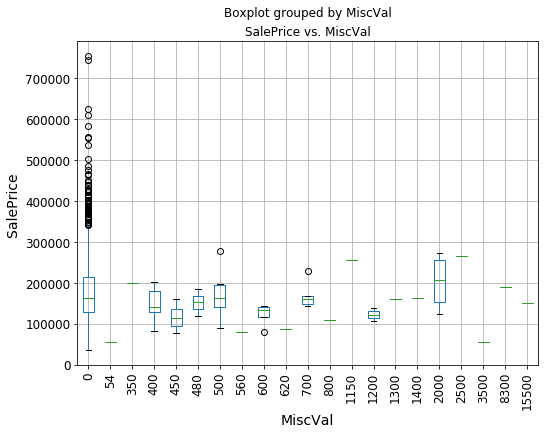

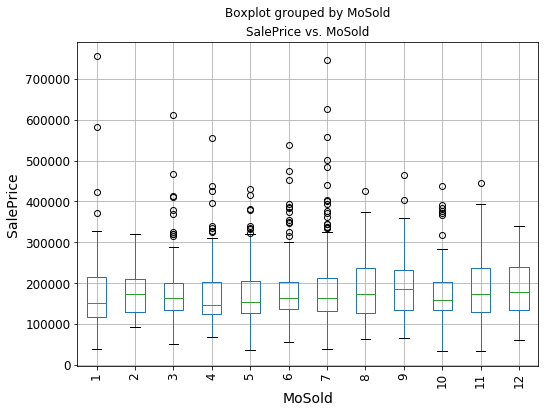

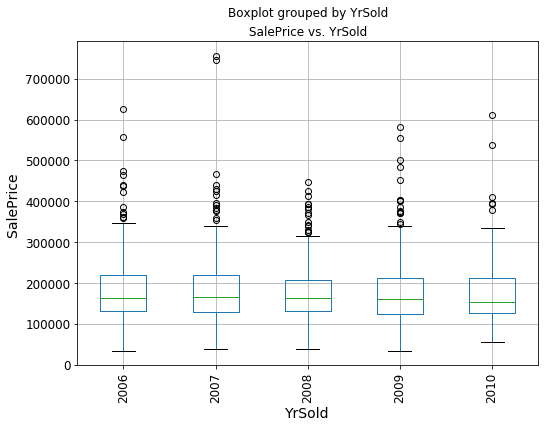

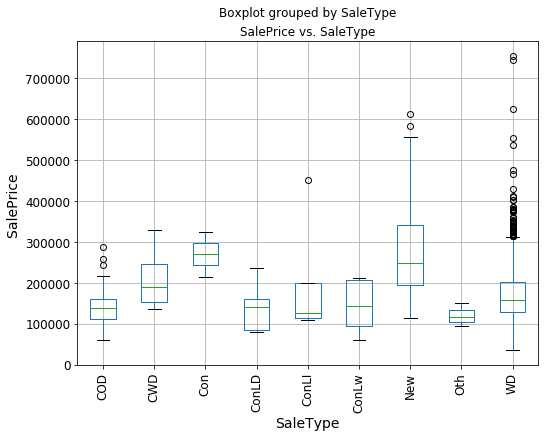

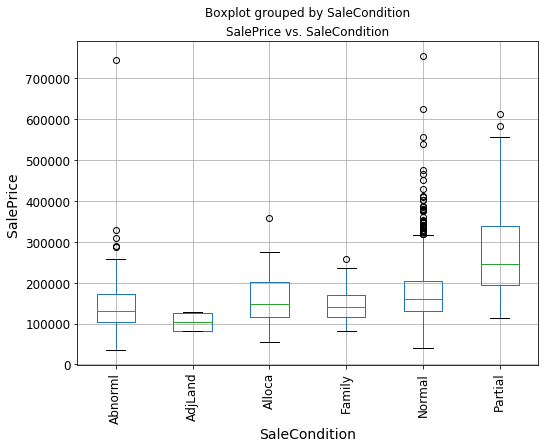

In [6]:
def box(df):
    import matplotlib.pyplot as plt
    
    ## Loop over the columns and create the box plots
    cols = df.columns.tolist()
    for col in cols:
        
        if(df[col].dtype not in [np.int64, np.int32, np.float64] or len(set(df[col]))<40):
            fig = plt.figure(figsize=(8, 6))
            fig.clf()
            ax = fig.gca()
            df.boxplot(column = 'SalePrice', by = col, ax = ax)
            ax.set_xlabel(col)
            plt.xticks(rotation=90)
            ax.set_ylabel('SalePrice ')
            ax.set_title('SalePrice vs. ' + col) 
            #ax.set_xticklabels( rotation=45 )
    return 'Done'


box(train)

C:\Users\BQUIDET\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


'Done'

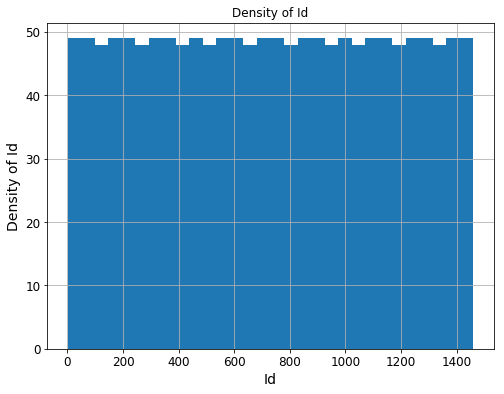

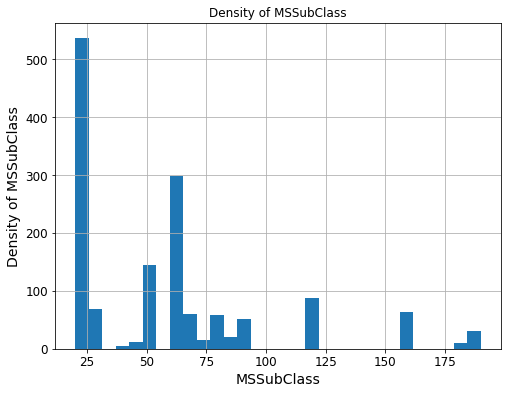

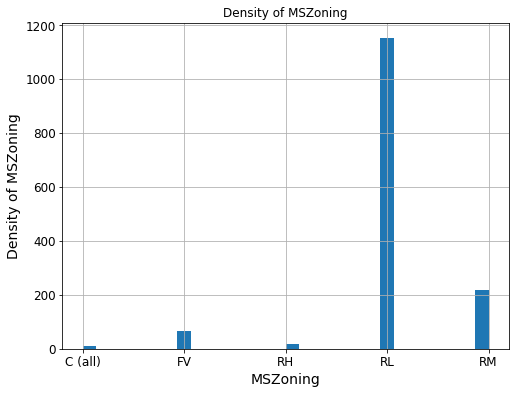

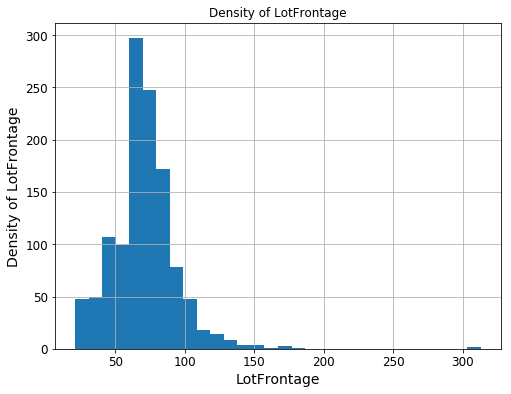

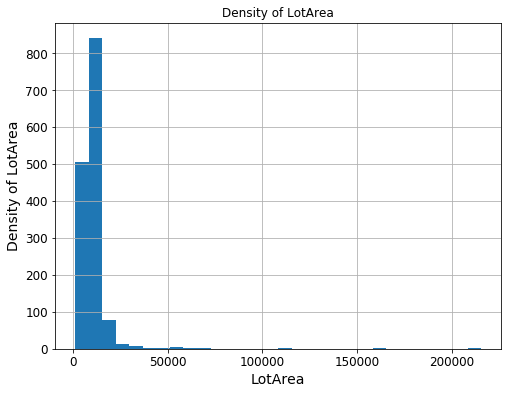

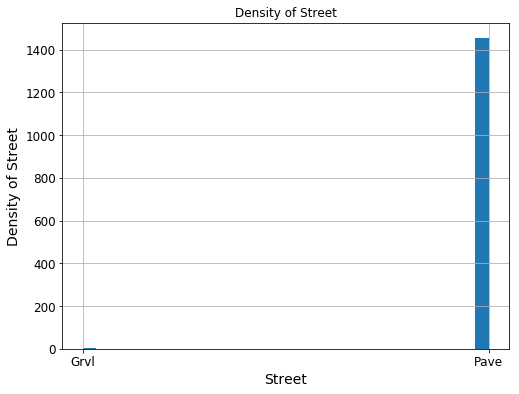

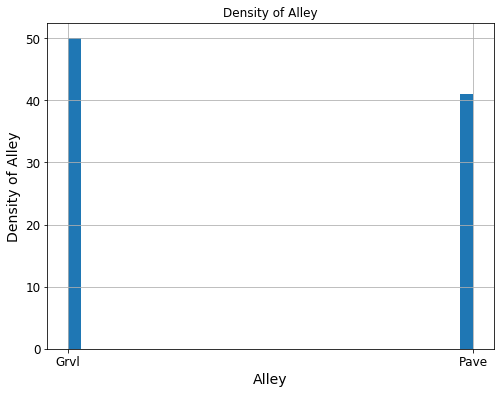

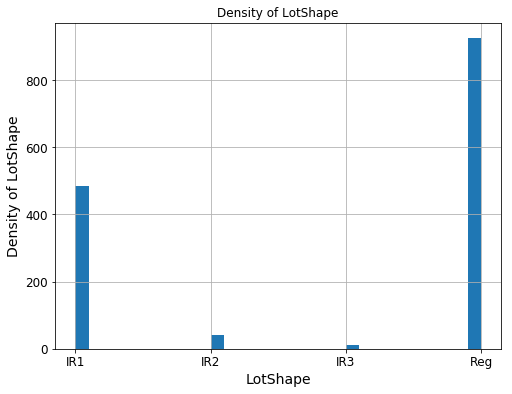

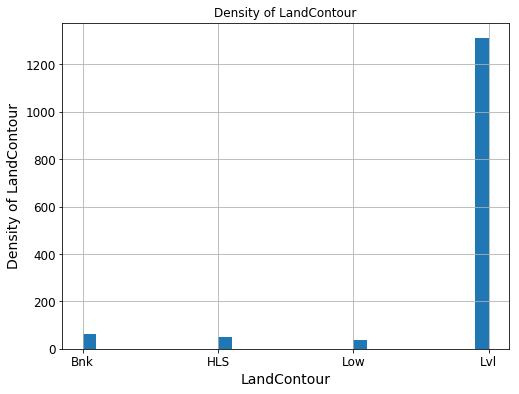

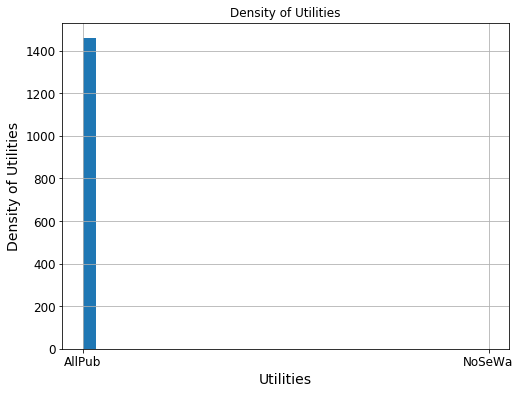

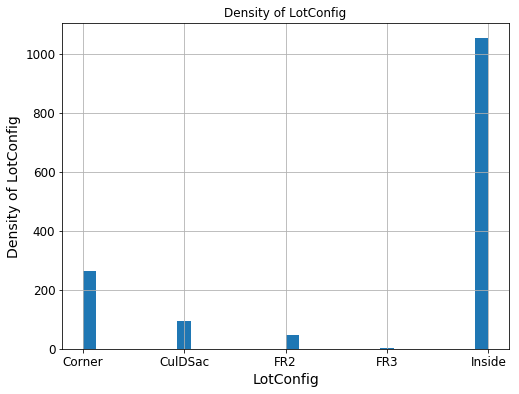

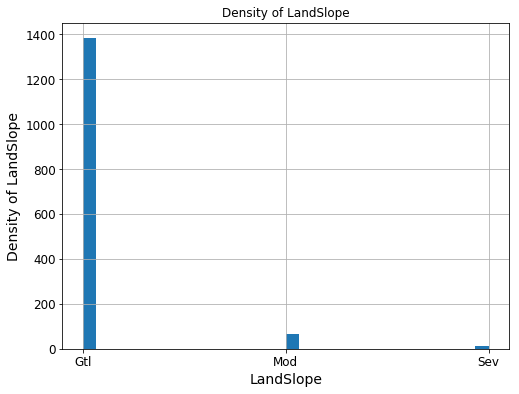

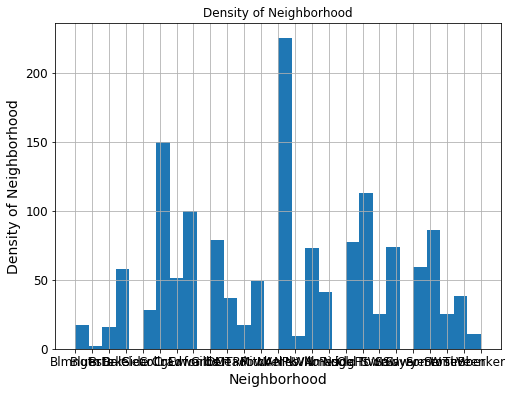

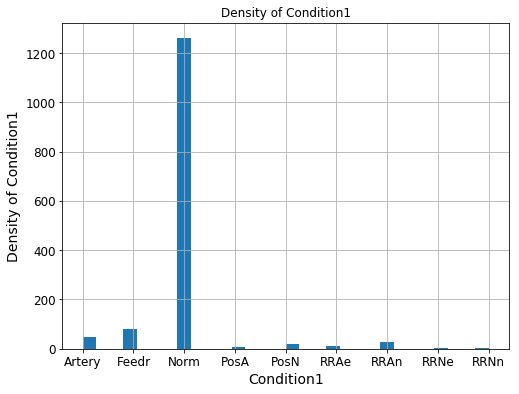

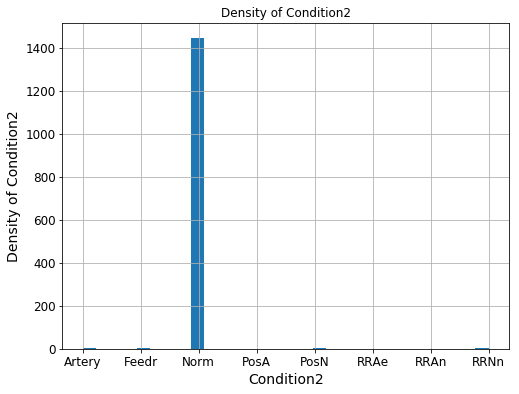

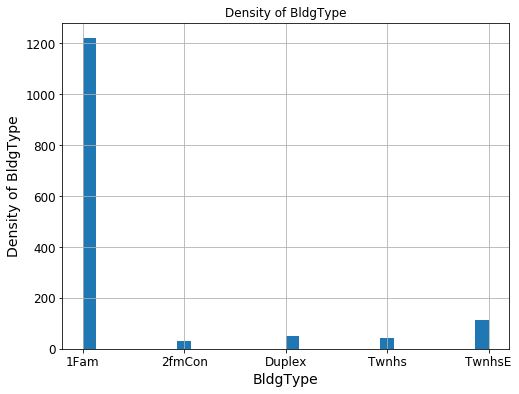

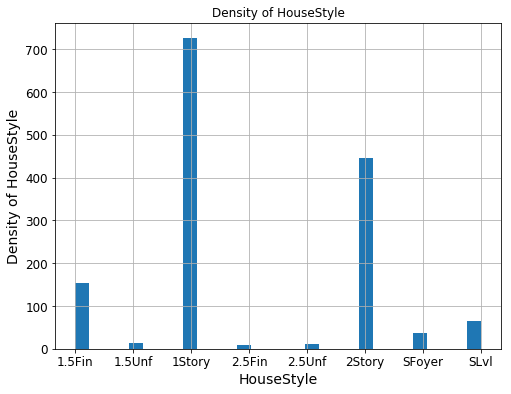

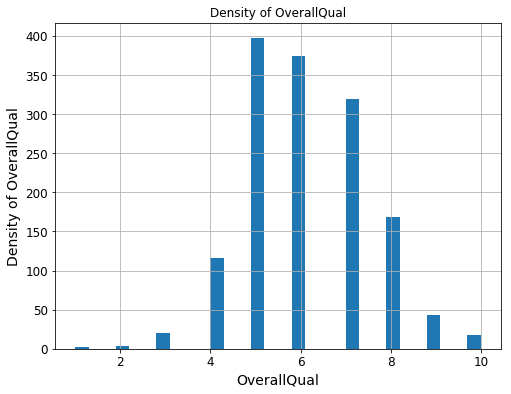

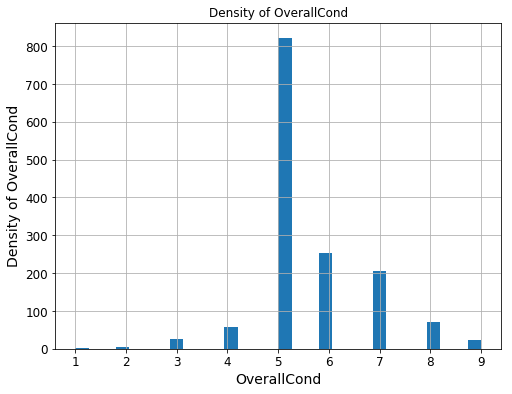

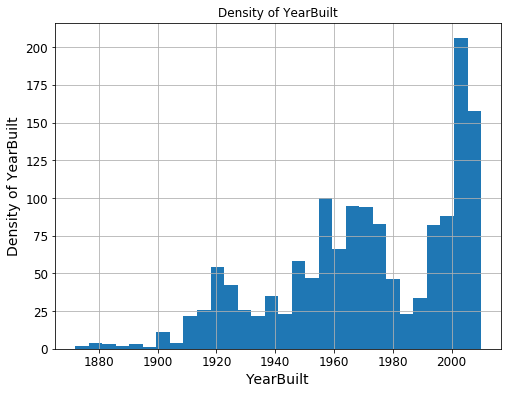

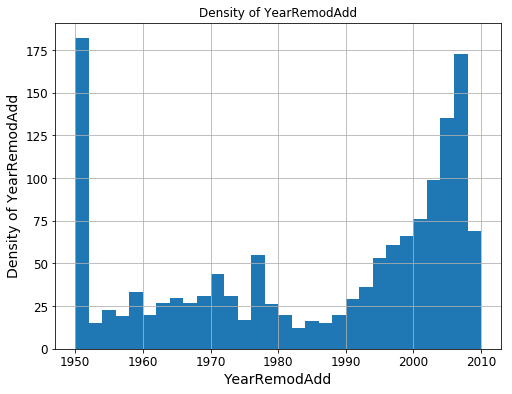

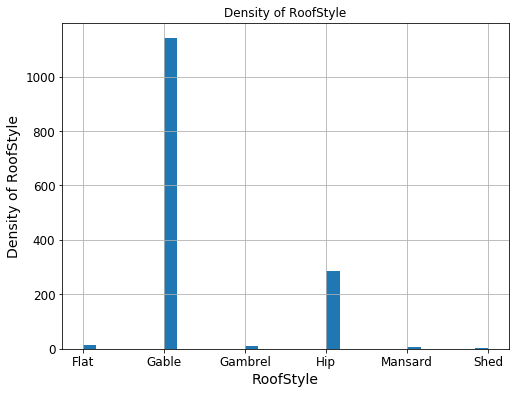

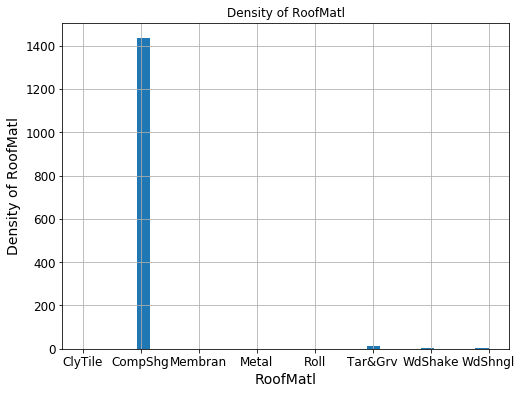

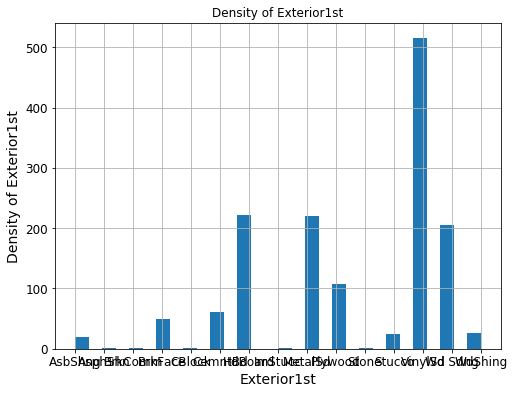

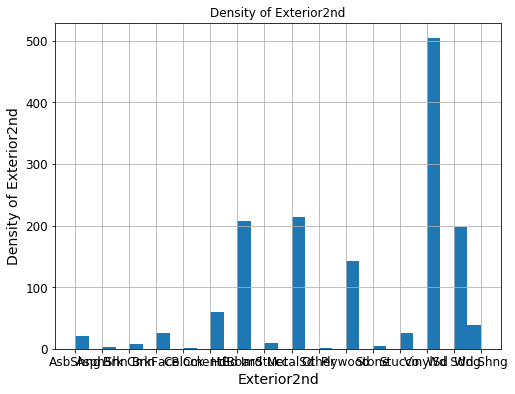

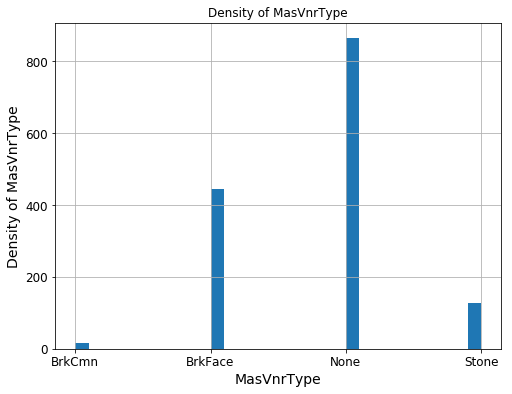

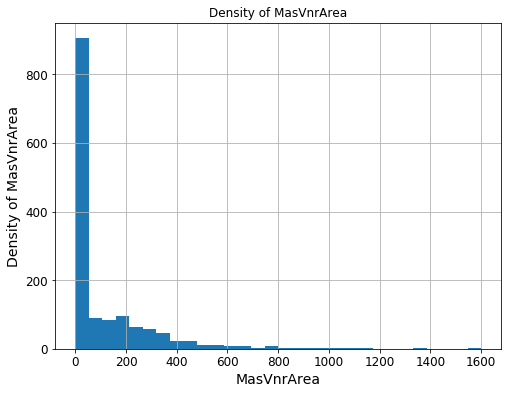

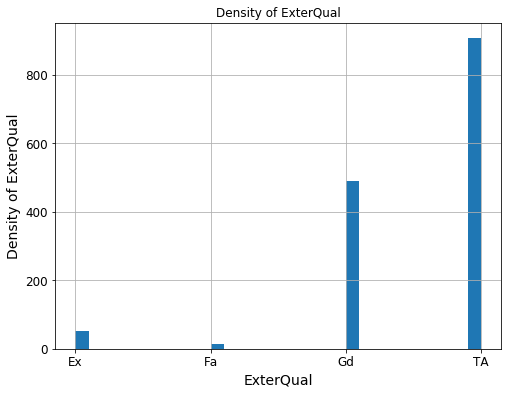

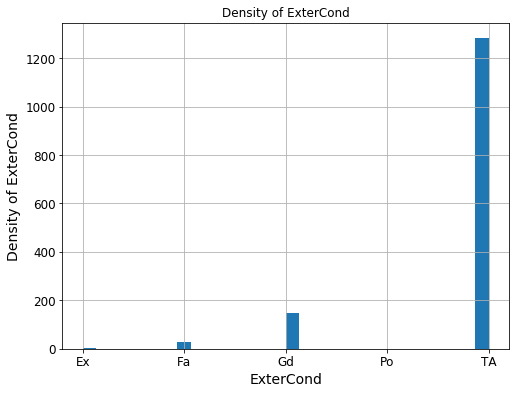

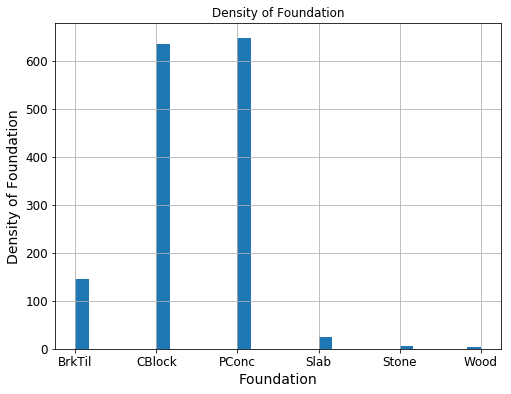

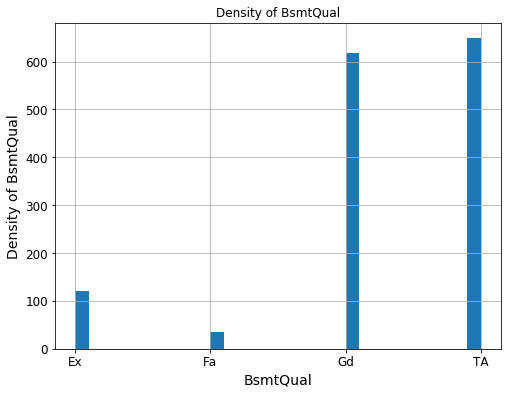

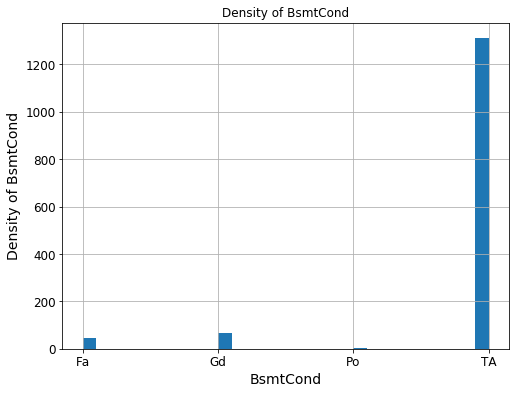

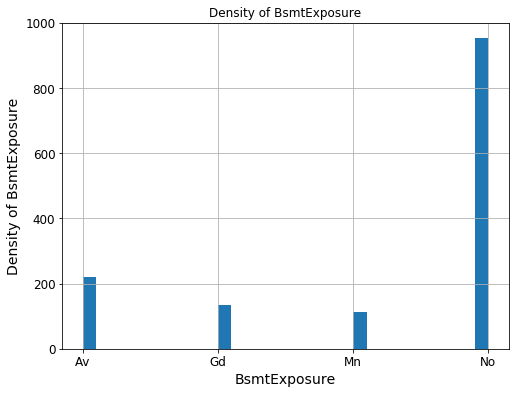

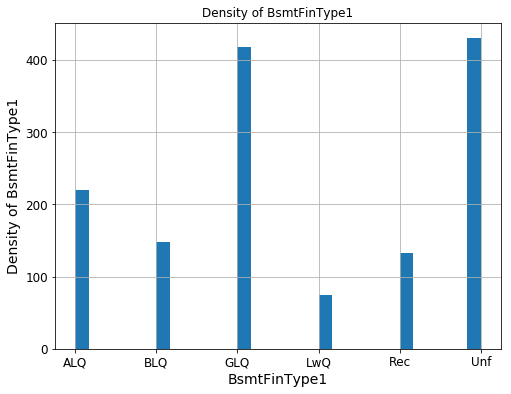

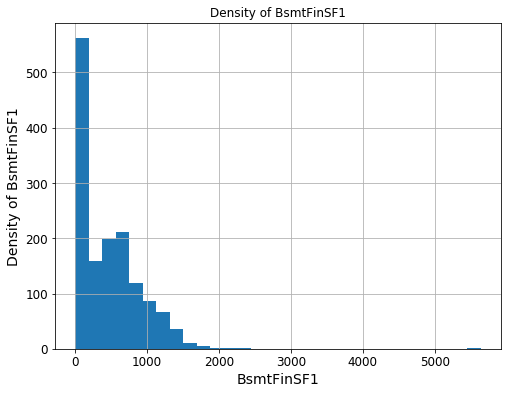

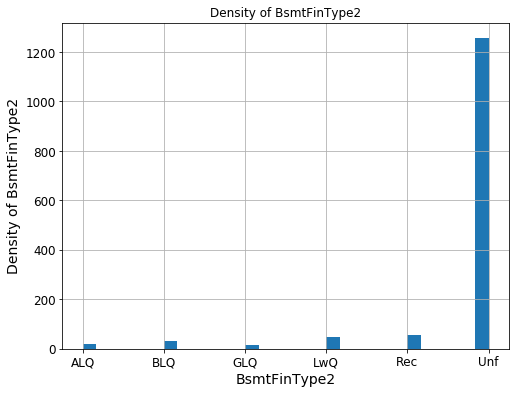

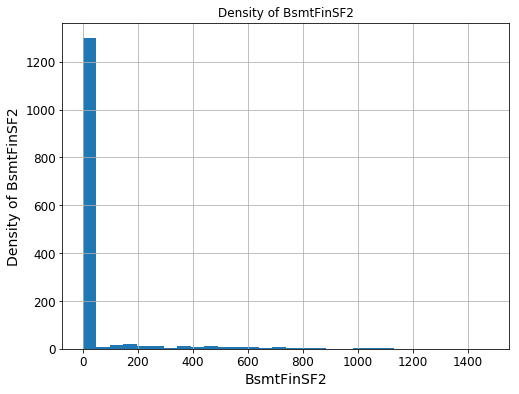

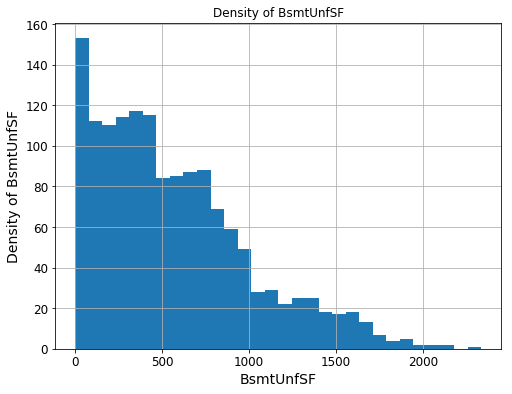

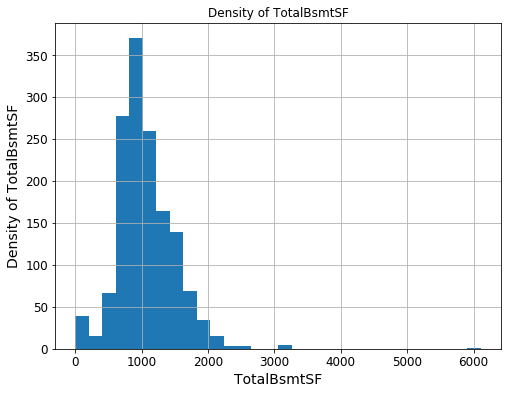

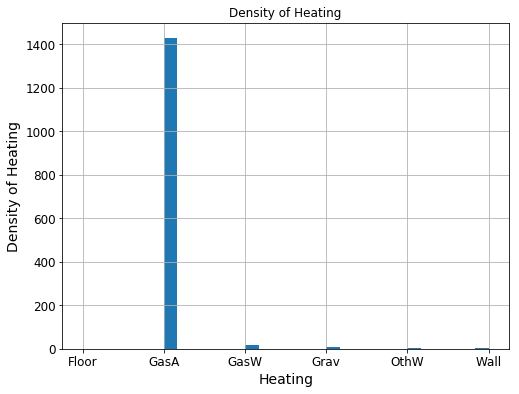

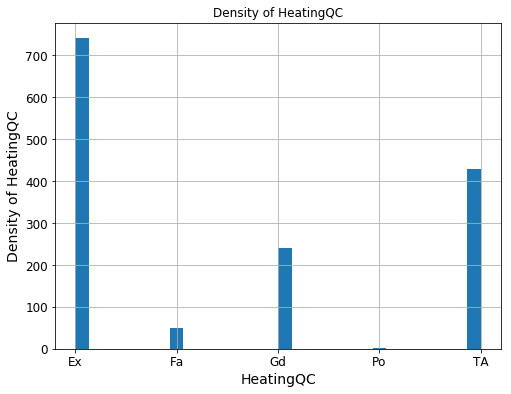

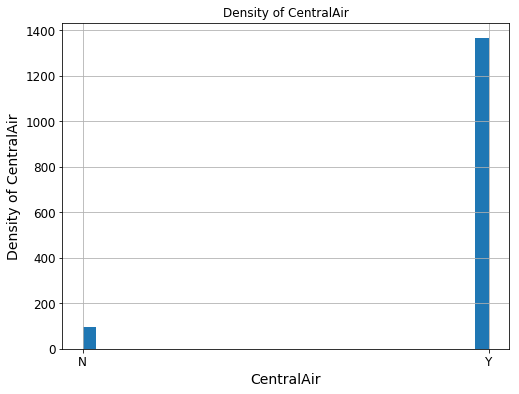

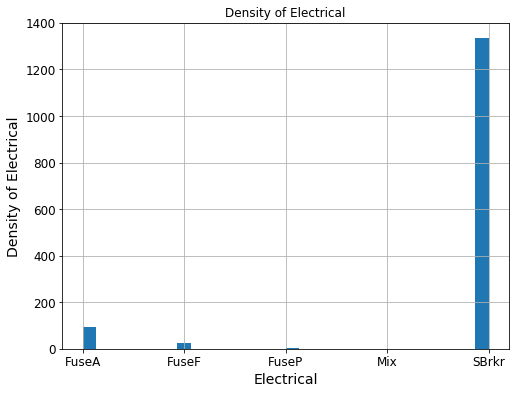

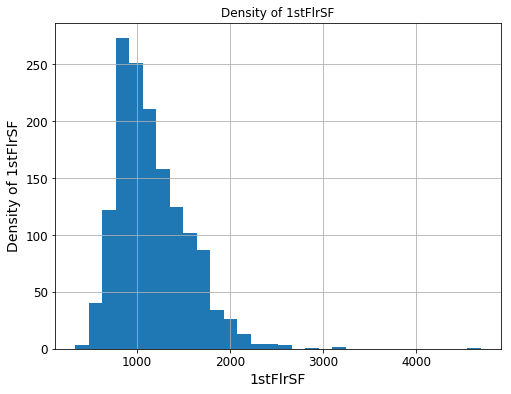

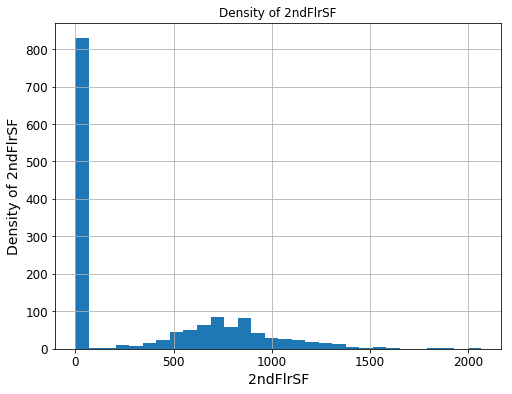

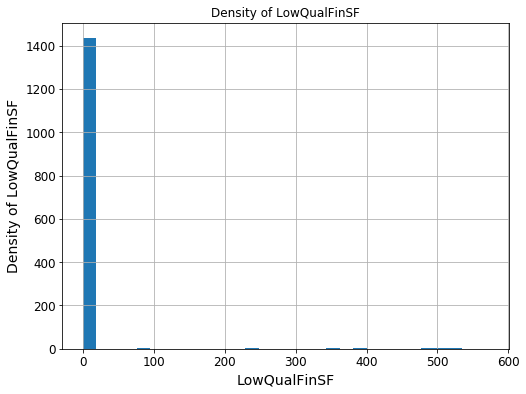

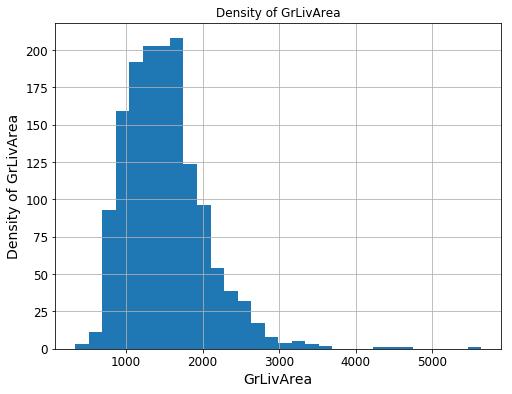

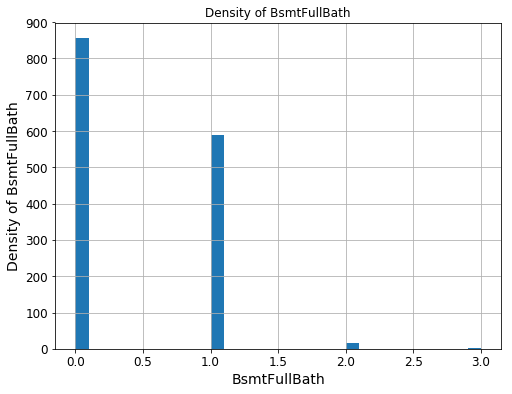

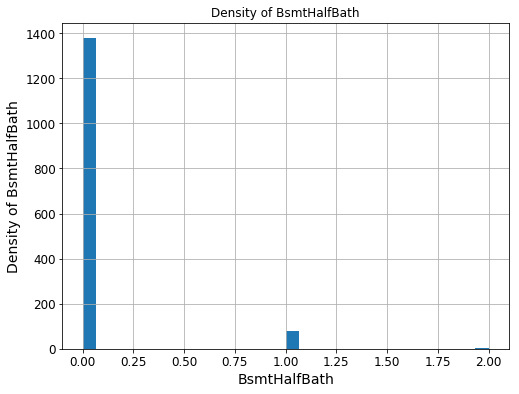

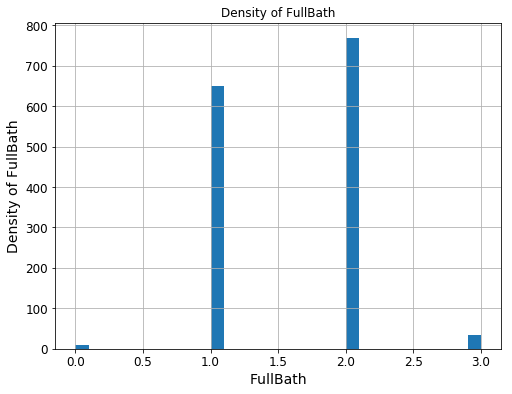

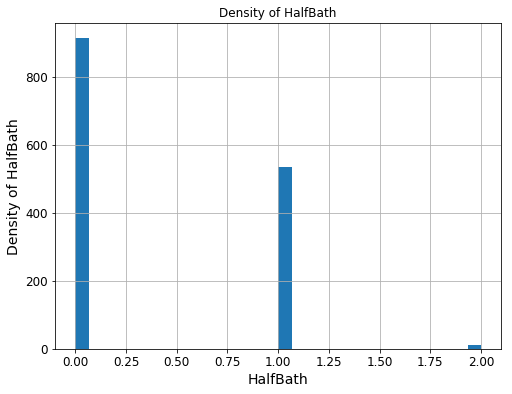

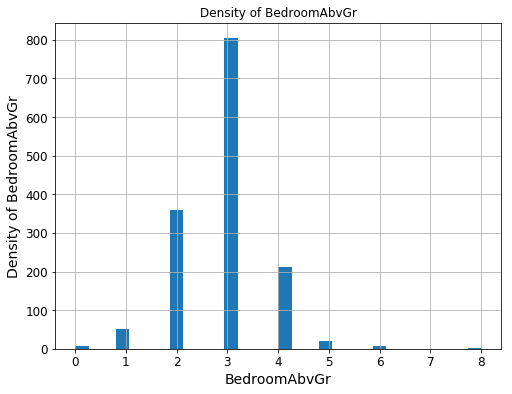

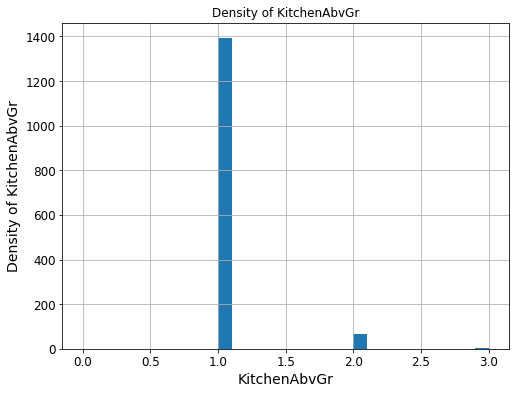

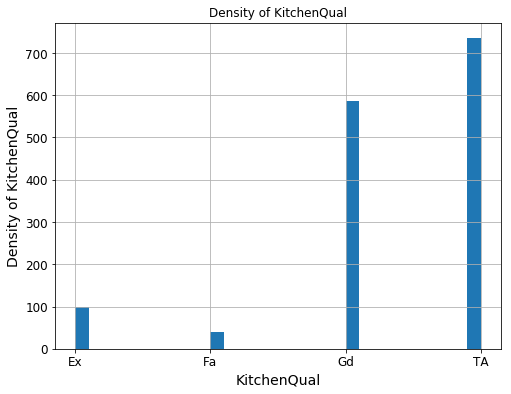

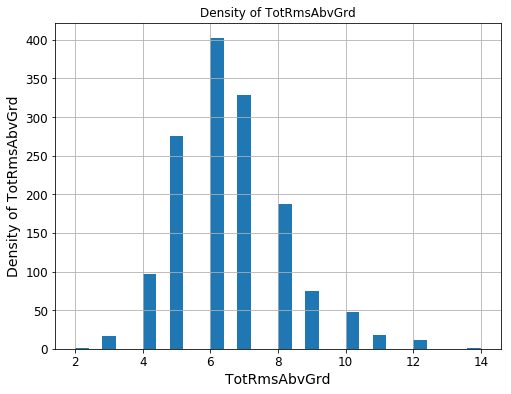

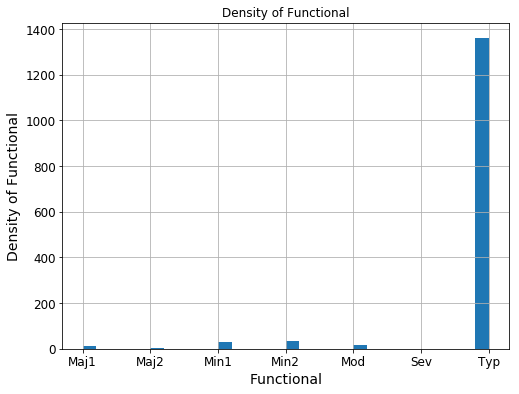

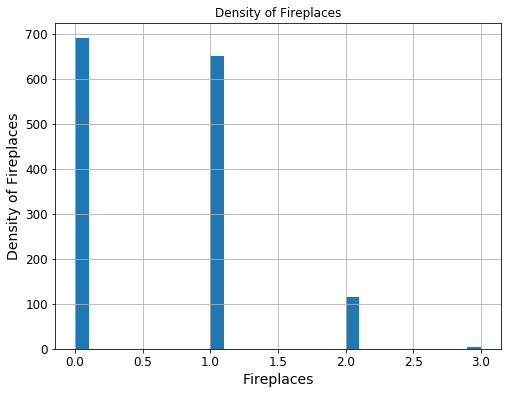

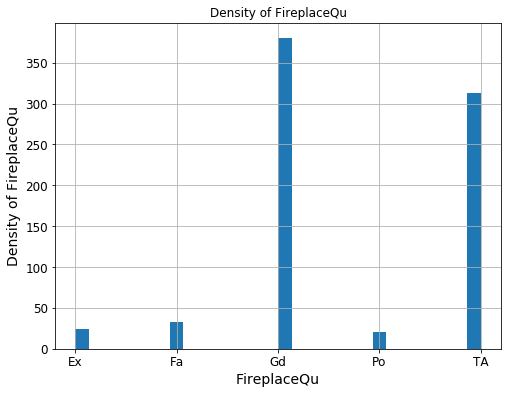

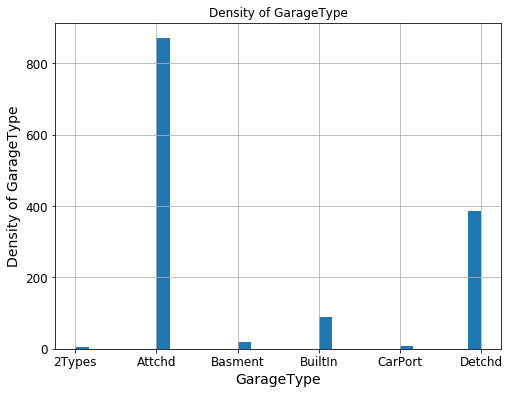

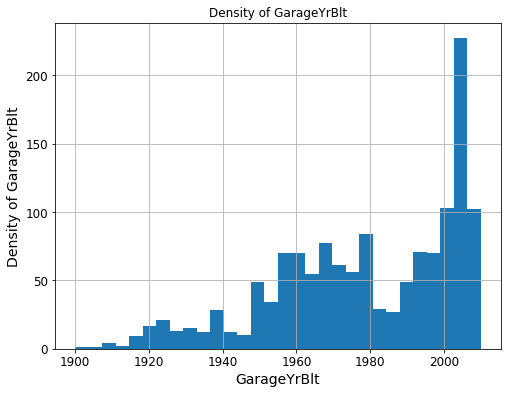

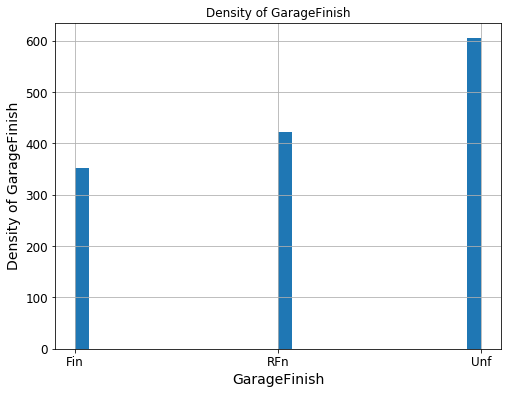

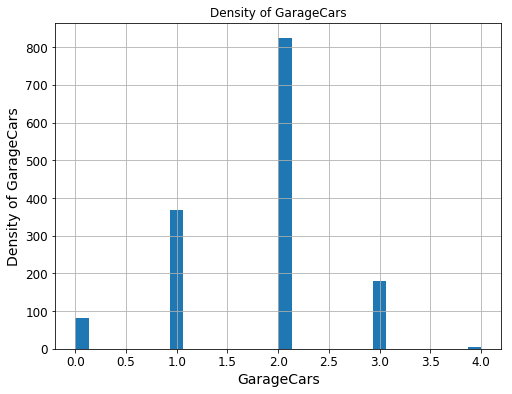

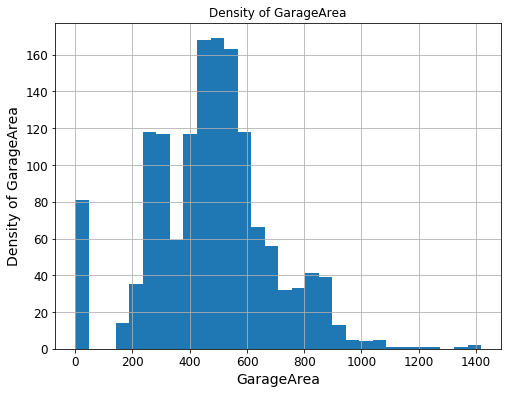

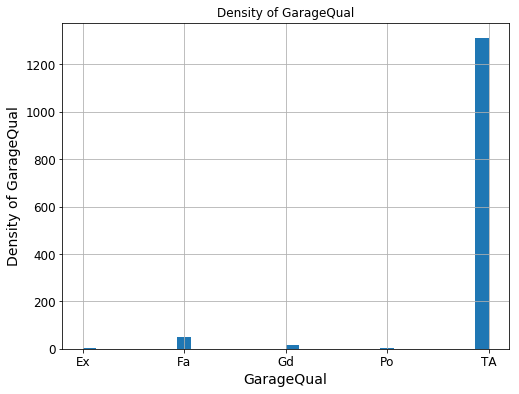

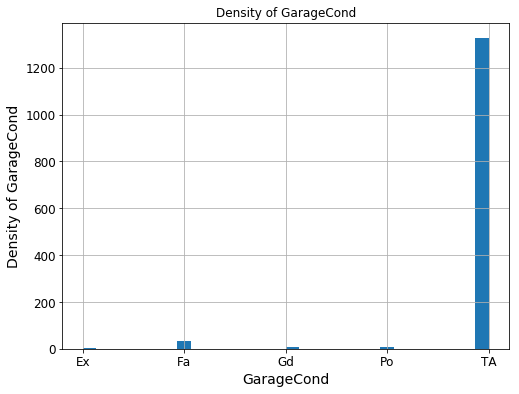

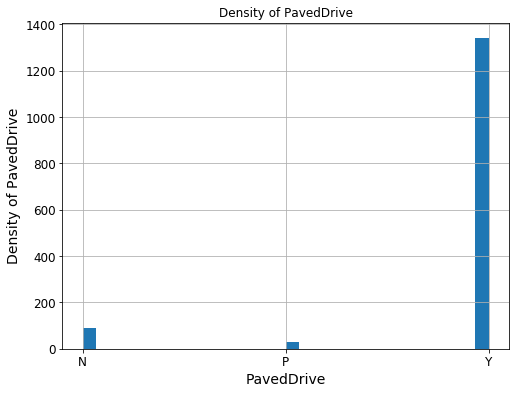

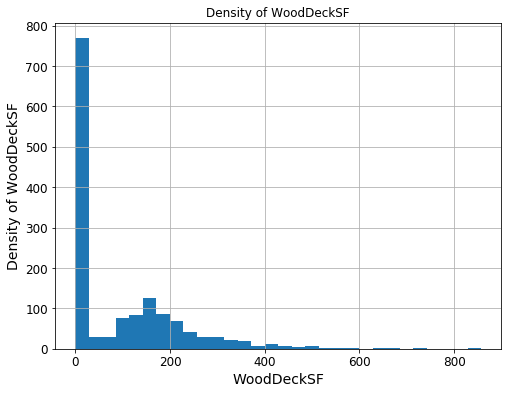

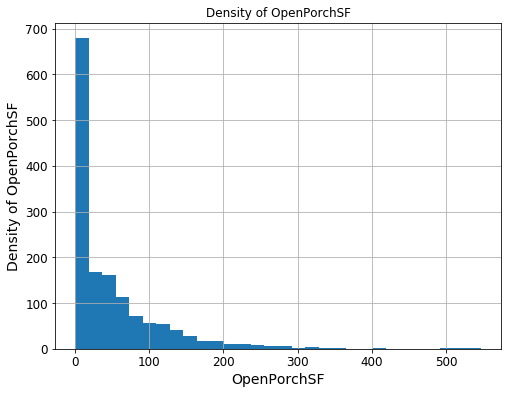

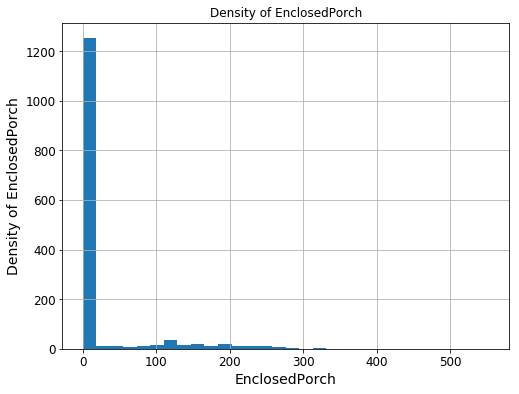

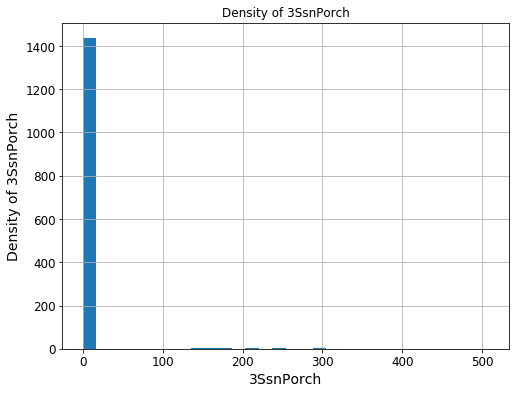

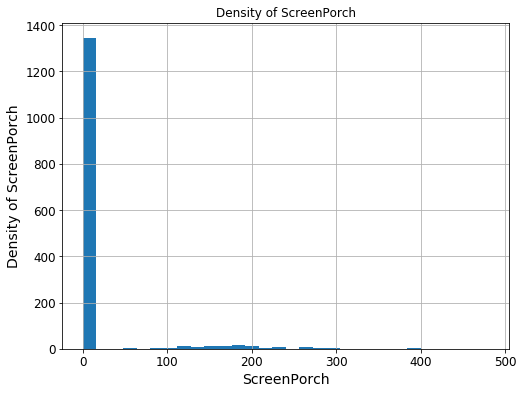

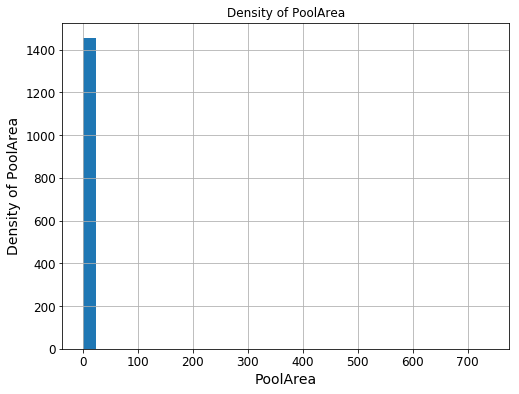

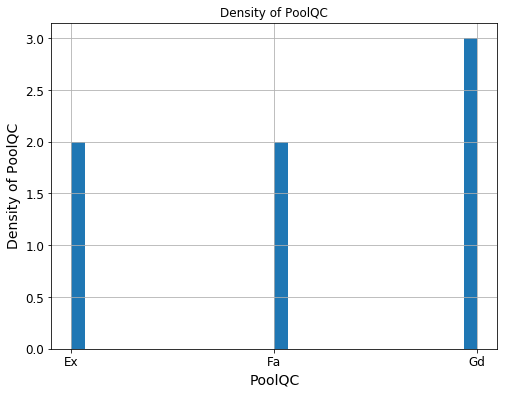

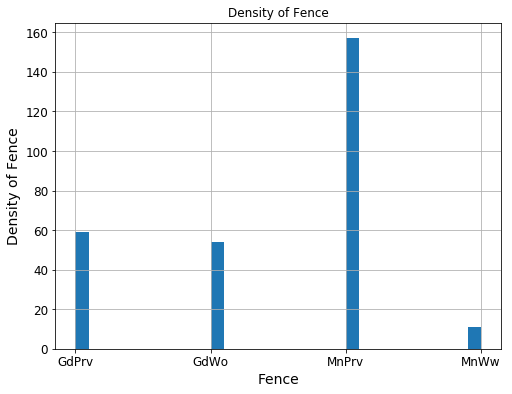

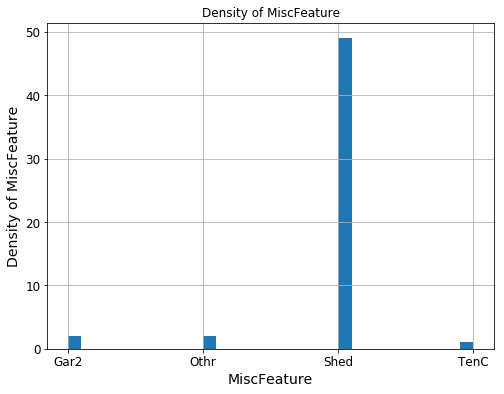

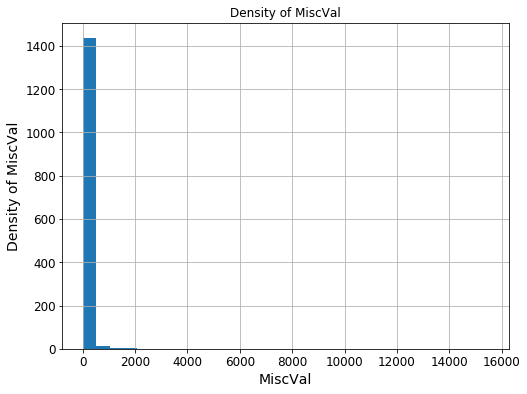

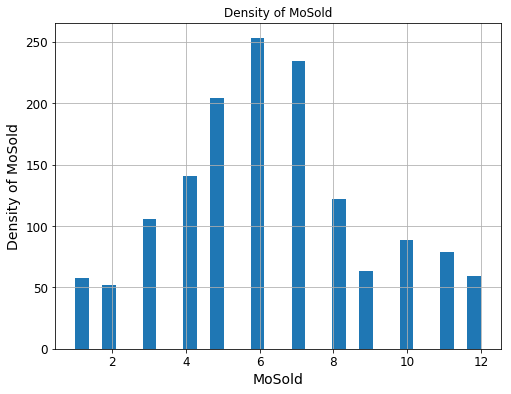

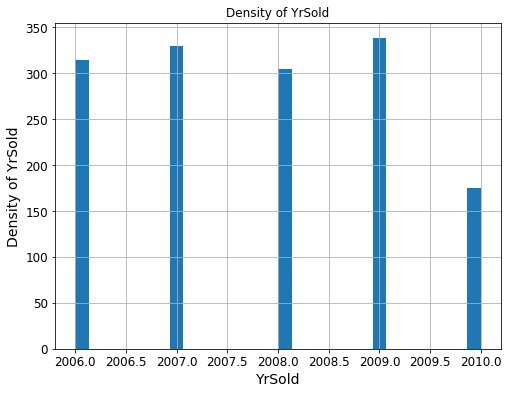

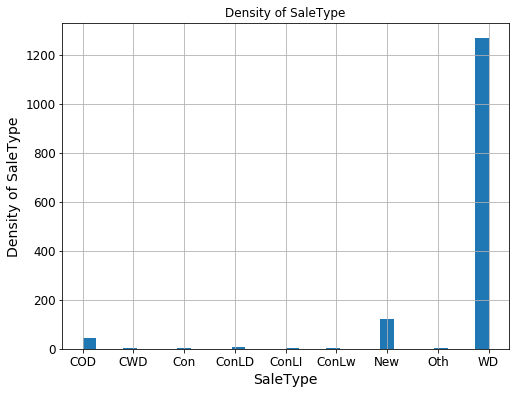

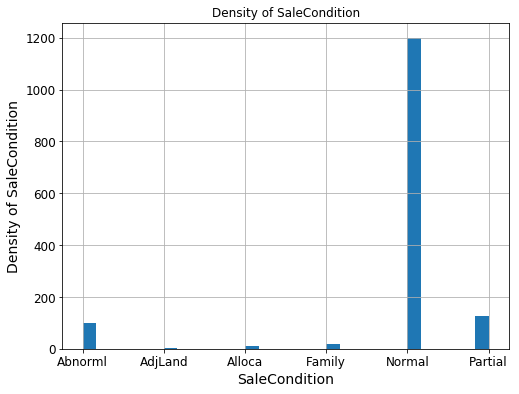

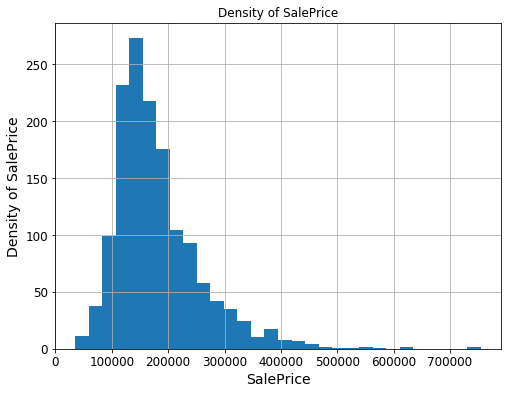

In [7]:
def hist(df):    
    import matplotlib.pyplot as plt
    cols = df.columns.tolist()
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
    return 'Done'

hist(train)

# B. Defining a pipeline 

In [30]:
from sklearn.pipeline import Pipeline, FeatureUnion
from scipy.stats import skew

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
from sklearn.utils import check_array
from scipy import sparse


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
#from sklearn.preprocessing import CategoricalEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

from sklearn.base import TransformerMixin #gives fit_transform method for free
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    """Perform one-hot encoding to categorical features."""
    def __init__(self, cat_features):
        self.cat_features = cat_features

    def fit(self, X_cat, y=None):
        return self

    def transform(self, X_cat):
        X_cat_df = pd.DataFrame(X_cat, columns=self.cat_features)
        X_onehot_df = pd.get_dummies(X_cat_df, columns=self.cat_features)
        return X_onehot_df.values
    
    def get_params(self, X_cat):
        X_cat_df = pd.DataFrame(X_cat, columns=self.cat_features)
        X_onehot_df = pd.get_dummies(X_cat_df, columns=self.cat_features)
        return X_onehot_df.columns

class MissingSelector(BaseEstimator, TransformerMixin):
    def __init__(self, ratio):
        self.ratio = ratio
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return drop_missing(X, self.ratio)
    

    
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class CustomNoCustomUnskewerrmalizer(BaseEstimator, TransformerMixin):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return ((X - self.mean) / self.std)
    
class CustomNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return scaler.fit_transform(X)
    
class Cat_into_str(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].applymap(str)
    
class LabelBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = self.prep(X)
        unique_vals = []
        for column in X.T:
            unique_vals.append(np.unique(column))
        self.unique_vals = unique_vals
    def transform(self, X, y=None):
        X = self.prep(X)
        unique_vals = self.unique_vals
        new_columns = []
        for i, column in enumerate(X.T):
            num_uniq_vals = len(unique_vals[i])
            encoder_ring = dict(zip(unique_vals[i], range(len(unique_vals[i]))))
            f = lambda val: encoder_ring[val]
            f = np.vectorize(f, otypes=[np.int])
            new_column = np.array([f(column)])
            if num_uniq_vals <= 2:
                new_columns.append(new_column)
            else:
                one_hots = np.zeros([num_uniq_vals, len(column)], np.int)
                one_hots[new_column, range(len(column))]=1
                new_columns.append(one_hots)
        new_columns = np.concatenate(new_columns, axis=0).T        
        return new_columns

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    @staticmethod
    def prep(X):
        shape = X.shape
        if len(shape) == 1:
            X = X.values.reshape(shape[0], 1)
        return X

    
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    """Perform one-hot encoding to categorical features."""
    def __init__(self, cat_features):
        self.cat_features = cat_features

    def fit(self, X_cat, y=None):
        return self

    def transform(self, X_cat):
        X_cat_df = pd.DataFrame(X_cat, columns=self.cat_features)
        X_onehot_df = pd.get_dummies(X_cat_df, columns=self.cat_features)
        return X_onehot_df.values
    
class CategoricalEncoder(BaseEstimator, TransformerMixin):
 
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
    
    
    #def get_feature_names(self,X):
        #feature_name = []
        #n_samples, n_features = X.shape
        
        #for i in range(len(self.categories_)-1):
            #for j in range(len(self.categories_[i])-1):
                #print(self.categories_[i][j])
                
                #print(len(_label_encoders_))
                #print(len(self.categories_)-1)
                #feature_name.append(X.columns[i]+'__'+self.categories[i][j])
        #return feature_name
        #print(len(feature_name))
    
#class CombineAttributesAdder(BaseEstimator, TransformrMixin):
#    def __init__(self, add_TotalSF = True):
#        self.add_TotalSF = add_TotalSF 
#    def fit(self, X, y=None):
#       return self
#    def transform(self, X, y=None):
#        if self.add_TotalSF:
#            TotalSF = X.TotalBsmtSF + X.TotalBsmtSF + X.2ndFlrSF 
#            return np.c_[X,TotalSF]
#        else:
#            return X


train = pd.read_csv('train.csv',sep=',')
test = pd.read_csv('test.csv',sep=',')
train.head()
    
# prep train data
label_col = "SalePrice"
index_col = "Id"
xtest = test.drop([index_col], axis=1)
xtrain = train.drop([index_col, label_col], axis=1)
y = np.log1p(train[label_col])

# number of training samples, to be used to collect training examples after modification of pipeline
samples = xtrain.shape[0] 

# all data, combo dataframe
housing = pd.concat([xtrain, xtest])


# Let's create a pipeline for categories and numerics
num_attribs = [e for e in housing.columns if housing[e].dtype in [np.int64, np.int32, np.float64, np.float32]]
cat_attribs = [e for e in housing.columns if e not in num_attribs]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        #('attribs_adder', CombineAttributesAdder()),
        #('std_scaler', StandardScaler()),
])


cat_pipeline = Pipeline([
        ('into_str', Cat_into_str(cat_attribs)),
        ('selector', DataFrameSelector(cat_attribs)),
        #('cat_encoder', CategoricalEncoder()),
        #('label_encoder', LabelEncoder()),
        #('cat_encoder', CustomLabelBinarizer(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])


# Now let's consolidate the full pipeline
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
])


xtrain = housing[:samples]

In [31]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('linear', LinearRegression()),
])

y = np.log1p(train[label_col])

#housing_prepared = full_pipeline_with_predictor.fit_transform(housing)

full_pipeline_with_predictor.fit(xtrain,y)
final_pred = full_pipeline_with_predictor.predict(xtrain)
print ("training rmse: ", np.sqrt(mean_squared_error(y, final_pred)))

('training rmse: ', 0.094437689603512634)


In [9]:
# We will not use the pipeline with predictor because there is problem when running cross_val_score and 
# gridsearch. There is a problem when encoding the categorical features and use grid search as explained 
# in stackoverflow unsolved discussion : https://stackoverflow.com/questions/47924363/labelencoder-in-sklearn-pandas-mapper-with-pipeline-after-cross-val-score-return/50021924#50021924
# We will put following line as comment as it runs error

#final_scores = cross_val_score(full_pipeline_with_predictor, xtrain, y, scoring="neg_mean_squared_error", cv=10)
#print(np.sqrt(-final_scores))

#grid_params = {
        #'preparation__num_pipeline__imputer': ['mean', 'median','most_frequent'],
        #'linear__fit_intercept': [True, False],
        #'linear__normalize': [True, False],
    #}

#grid_search = GridSearchCV(full_pipeline_with_predictor, param_grid = grid_params, cv=10, scoring="neg_mean_squared_error")
#grid_search.fit(xtrain,y)

# C. Using different learning models / Tune parameters for each models with randomizedsearch

### 1) Linear model

In [6]:
# Let's use GridSearch to optmize the parameters
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    }

lin_reg = LinearRegression()
rnd_search = RandomizedSearchCV(lin_reg, param_distributions=param_distribs,
                                n_iter=4, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)

# We need to redefine xtrain for each model to be the training set from preparation pipeline

# Temporarily until we don't find solution for the full_pipeline_with_predictor we have to define housing_prepared
# as the transformation of housing through full_pipeline
housing_prepared = full_pipeline.fit_transform(housing)

xtrain = housing_prepared[:samples]
rnd_search.fit(xtrain, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    3.7s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
          fit_params=None, iid=True, n_iter=4, n_jobs=4,
          param_distributions={'fit_intercept': [True, False], 'normalize': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [7]:
#display_scores and best parameters

negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

def display_scores_params(scores):
    print("Scores:", scores)
    print("Mean:", np.sqrt(-rnd_search.cv_results_['mean_test_score']).mean())
    print("Standard deviation:", scores.std())
    print("Best params:", rnd_search.best_params_)
    
display_scores_params(rmse)

Scores: 0.15957231733032212
Mean: 700106103066.9559
Standard deviation: 0.0
Best params: {'normalize': False, 'fit_intercept': True}


We see that the mean of the gridearch score is very large. Indeed we noticed that when we normalize the data, it gives very large scores.
At this stage we don't understand the reason for that, if someone can help to explain it will be much appreciated'

In [8]:
lin_reg.fit(xtrain, y)
final_pred = rnd_search.predict(xtrain)

final_scores = cross_val_score(lin_reg, xtrain, y, scoring="neg_mean_squared_error", cv=10)

print("CV test scores :", np.sqrt(-final_scores))
print ("rmse(mean, std): (%lf, %lf)" % (np.sqrt(-final_scores.mean()), np.sqrt(final_scores.std())))
print ("training rmse: " ,np.sqrt(mean_squared_error(y, final_pred)))

CV test scores : [0.13548321 0.12390065 0.12217863 0.19371345 0.1448059  0.17885255
 0.12224312 0.09721003 0.26458412 0.14436295]
rmse(mean, std): (0.159485, 0.129867)
training rmse:  0.09444162303382576


In [70]:
from sklearn.externals import joblib
joblib.dump(rnd_search.best_params_, 'lin_params.pkl')

['lin_params.pkl']

### 2) Polynomial model

In [17]:
# Create a pipeline as previously defined but adding the Polynomial terms 
from sklearn.preprocessing import PolynomialFeatures

housing_prepared = full_pipeline.fit_transform(housing)
xtrain = housing_prepared[:samples]

full_pipeline_with_predictor = Pipeline([
    ('poly', PolynomialFeatures()),
    ("linear", LinearRegression()),
])

full_pipeline_with_predictor.fit(xtrain,y)

full_pipeline_with_predictor.get_params().keys()

dict_keys(['memory', 'steps', 'poly', 'linear', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'linear__copy_X', 'linear__fit_intercept', 'linear__n_jobs', 'linear__normalize'])

In [ ]:
# Now that we know the names of the parameters, we will use RandomSearch to find out the best polynomial degree

param_distribs = {
        'linear__fit_intercept': [True, False],
        'linear__normalize': [True, False],
        'poly__degree': [2],
        'poly__include_bias': [True],
        'poly__interaction_only': [True, False],
    }

rnd_search = RandomizedSearchCV(full_pipeline_with_predictor, param_distributions=param_distribs,
                                n_iter=6, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(xtrain, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
#display_scores and best parameters

negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
    
display_scores_params(rmse)

#Save model in joblib
from sklearn.externals import joblib
joblib.dump(rnd_search.best_estimator_, 'poly.pkl')

### 3) Decision Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor

param_distribs = {
        'max_leaf_nodes': [10, 20, 50, 100],
        'max_depth': [10, 20, 30,40, 50],
        'min_samples_leaf': [20, 50],
        'max_features': ['sqrt', None],
        'min_impurity_decrease': [0, 0.1],
    }

tree_reg = DecisionTreeRegressor()
rnd_search = RandomizedSearchCV(tree_reg, param_distributions=param_distribs,
                                n_iter=6, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)

# We need to redefine xtrain for each model to be the training set from preparation pipeline
housing_prepared = full_pipeline.fit_transform(housing)
xtrain = housing_prepared[:samples]
rnd_search.fit(xtrain, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    3.2s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=6, n_jobs=4,
          param_distributions={'max_leaf_nodes': [10, 20, 50, 100], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_leaf': [20, 50], 'max_features': ['sqrt', None], 'min_impurity_decrease': [0, 0.1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [10]:
tree_reg = DecisionTreeRegressor(**rnd_search.best_params_)
tree_reg.fit(xtrain,y)
predict = tree_reg.predict(xtrain)

final_scores = cross_val_score(tree_reg, xtrain, y, scoring="neg_mean_squared_error", cv=10)

# Let's create a list of feature names for illustration
feature_name = []
for i in range(len(full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_)):
    for j in range(len(full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_[i])):
        feature_name.append(full_pipeline.transformer_list[1][1].named_steps['selector'].attribute_names[i]+'__'+full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_[i][j])

feature_name = full_pipeline.transformer_list[0][1].named_steps['selector'].attribute_names + feature_name
        

In [12]:
#display_scores and best parameters

def display_scores_params(scores):
    print("Scores:", scores)
    print("Mean:", np.sqrt(-rnd_search.cv_results_['mean_test_score']).mean())
    print("Standard deviation:", scores.std())
    print("Best params:", rnd_search.best_params_)
    

negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
print (np.sqrt(-final_scores))
display_scores_params(rmse)

[0.21775697 0.16625119 0.2002943  0.21495281 0.23387701 0.16413067
 0.19336262 0.18507876 0.21034157 0.2093194 ]
Scores: 0.21362500132366488
Mean: 0.29255400049752134
Standard deviation: 0.0
Best params: {'min_samples_leaf': 50, 'min_impurity_decrease': 0, 'max_leaf_nodes': 100, 'max_features': None, 'max_depth': 10}


 ### Question : How do you know you're model is not overfitting the data ?

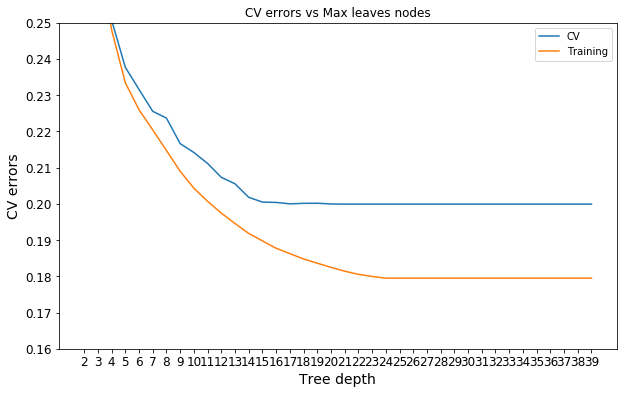

In [13]:
# I will plot CV mean errors versus number of tree nodes to illustrate the improvement made in the error
tree_params = rnd_search.best_params_
tree_params['max_depth'] = 5

errorsCV = []
errorsTrain = []
errorsTest = []

plot_range = np.arange(2,40,1)
for depth in plot_range:
    
    tree_params['max_leaf_nodes'] = depth
    tree_reg = DecisionTreeRegressor(**tree_params)
    tree_reg.fit(xtrain,y)
    predict = tree_reg.predict(xtrain)
    
    final_scores = cross_val_score(tree_reg, xtrain, y, scoring="neg_mean_squared_error", cv=10)
    errorsCV.append(np.sqrt(-final_scores).mean())
    errorsTrain.append(np.sqrt(mean_squared_error(y, predict)))

fig = plt.figure(figsize=(10, 6))
fig.clf()
ax = fig.gca()
plt.plot(plot_range,errorsCV);
plt.plot(plot_range,errorsTrain);
plt.xticks(plot_range)
ax.set_ylim(0.16, 0.25)

ax.set_xlabel('Tree depth')
ax.set_ylabel('CV errors')
plt.legend(['CV','Training'])
ax.set_title('CV errors vs Max leaves nodes');   

=> We deduct that we don't improve the error by adding more than 15 leaves nodes, it shows that we are not underfitting the model if we consider a tree bigger than 15 nodes

We will illustrate with the best paramters of the random search, as for the moment we don't need to keep Decision Tree as our model because it is not performing as good as Linear model.

In [124]:
# Let's vizualise our Tree
from sklearn.tree import export_graphviz

export_graphviz(
    tree_reg,
    out_file=r"C:\Users\BQUIDET\IPython Notebooks\Kaggle\House Pricing\Decision_tree_house_price.dot",
    feature_names=feature_name,
    class_names=feature_name,
    rounded=True,
    filled=True
)

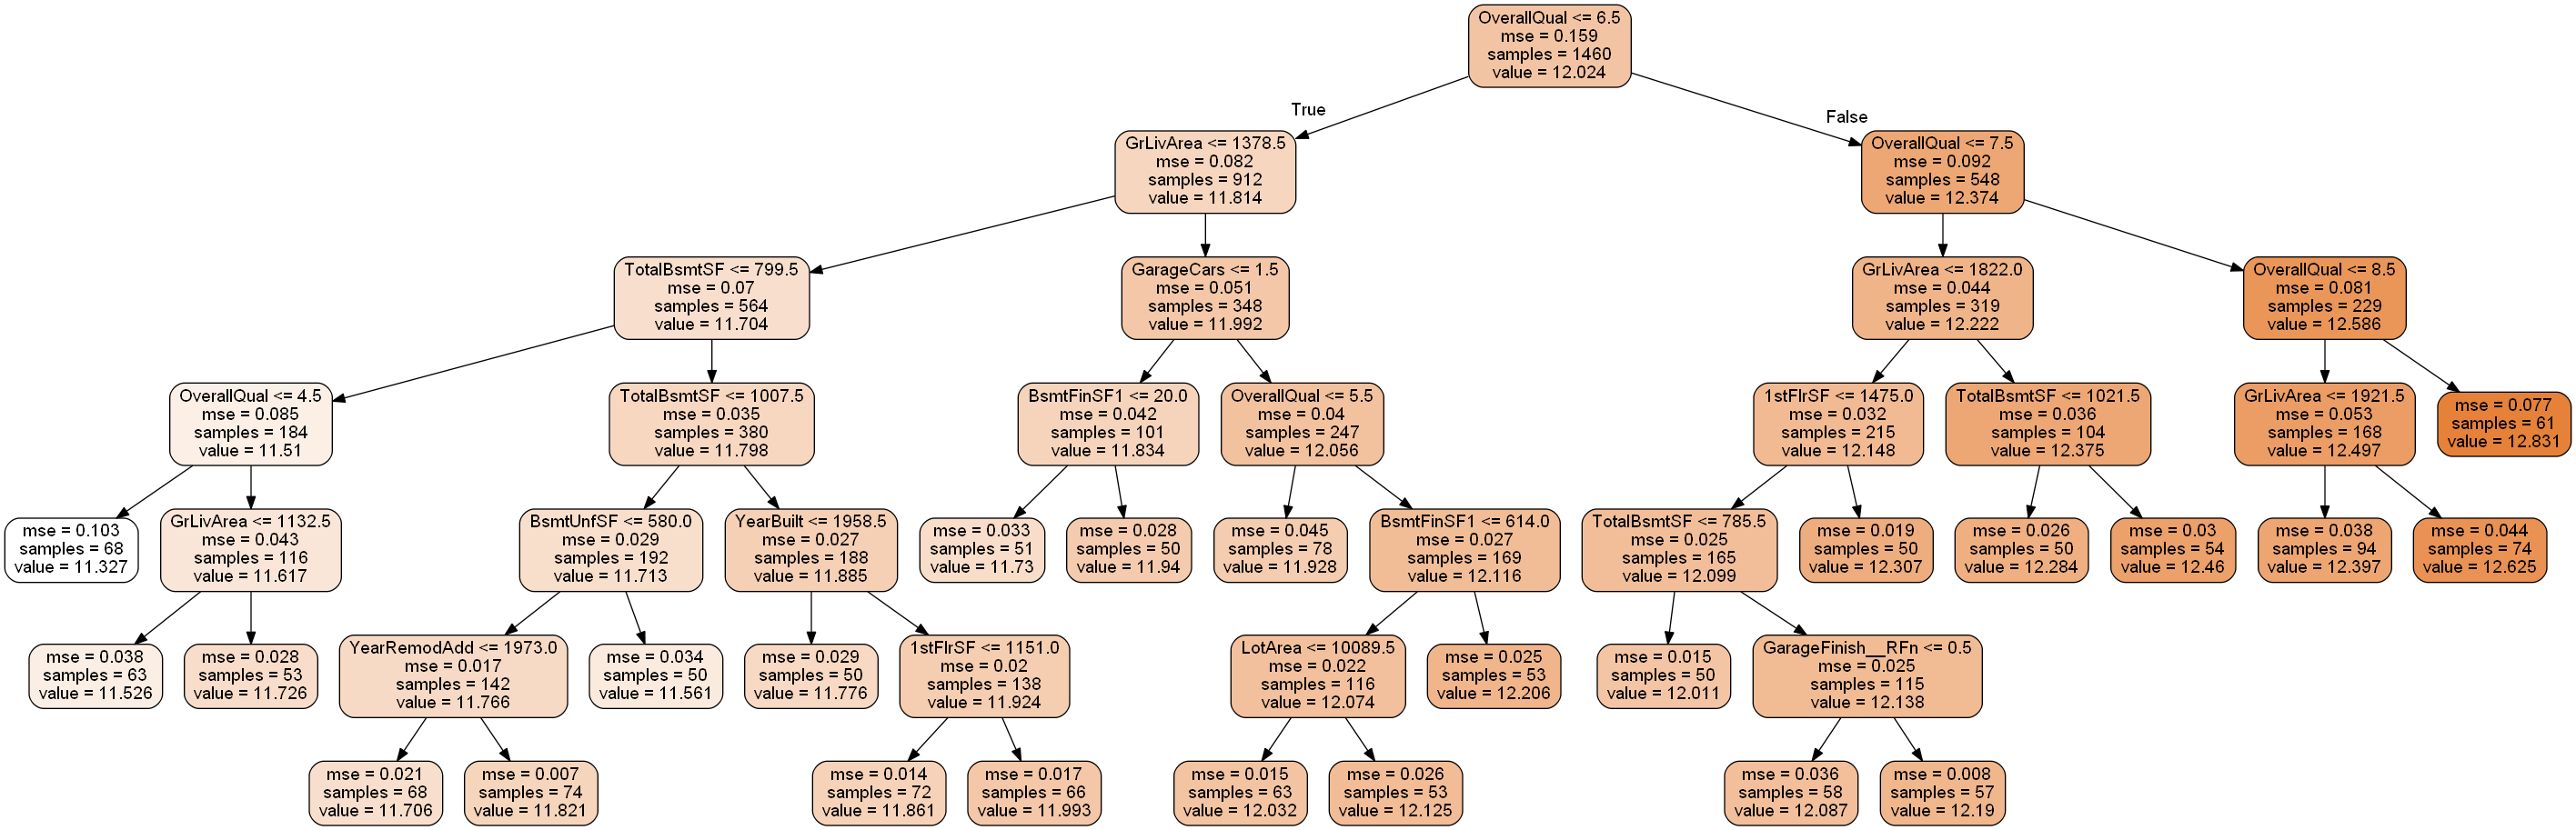

In [6]:
# Let's show the picture, after having converted it into jpng
# Please refer to graphviz manual for that
from IPython.display import Image
Image(filename = r"C:\Users\BQUIDET\IPython Notebooks\Kaggle\House Pricing\Decision_tree_house_price.png", width=10000, height=1000000)

In [23]:
#Save model in joblib
from sklearn.externals import joblib
joblib.dump(rnd_search.best_estimator_, 'decision_tree.pkl', protocol=2)

['decision_tree.pkl']

### 4) Support Vector Regressor

In [ ]:
# Let's use RandomSearch to optimize the parameters
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)

# We need to redefine xtrain for each model to be the training set from preparation pipeline
xtrain = housing_prepared[:samples]
rnd_search.fit(xtrain, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#display_scores and best parameters

negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
    
display_scores_params(rmse)

 #### => We can conclude that there are NO improvements made by models such as Decision Trees, SVM.. or even by adding polynomial degrees to the features



    
=> We will come back later on Boosted Trees as we believe it make significant difference compared with Decision Trees, which tends to overfit the data

=> For now let's focus on the linear model which beat all model so far.
We will try to improve the model by studing the outliers, in a error based way and in an intuitive way 
( reading comments from author of the data set).
After that we will try to fix the problem of overfitting, as we noticed our training error is much lower than CV average: 0.09 versus 0.16

Finally we will try to illustrate which are the most important features, and maybe we will run the regression on the 
projected feature vectors from the principal components.
    

# D. Treating outliers, missing data / We create another notebook for Outliers and Residus

### 1) Error based outliers

In [87]:
# For illustration purposes please refer to Residus and Outliers notebook we improved the model
# In that notebook we will reason and show where are the outliers and study the points with large errors
# Let's redefine the training examples by taking out the points which have error values above 95%
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    }

lin_reg = LinearRegression()
rnd_search = RandomizedSearchCV(lin_reg, param_distributions=param_distribs,
                                n_iter=4, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)

rnd_search.fit(xtrain,y)
pred = rnd_search.predict(xtrain) - y
perc_95_pct = pred.quantile( 0.95)

inliers = np.abs(pred)< perc_95_pct
xtrain_no_outliers = xtrain[inliers]
y_no_outliers = y[inliers]

# Let's fit a new Linear regresion model with the parameters of random search previously found
lin_reg_no_outliers = LinearRegression()
lin_reg_no_outliers.fit(xtrain_no_outliers, y_no_outliers)
lin_reg_no_outliers

final_scores_no_outliers = cross_val_score(lin_reg_no_outliers, xtrain_no_outliers, y_no_outliers, scoring="neg_mean_squared_error", cv=10)
np.sqrt(-final_scores_no_outliers)

final_pred = lin_reg_no_outliers.predict(xtrain_no_outliers)

print (np.sqrt(-final_scores_no_outliers))
print ("rmse(mean, std): (%lf, %lf)" % (np.sqrt(-final_scores.mean()), np.sqrt(final_scores.std())))
print ("training rmse: ", np.sqrt(mean_squared_error(y_no_outliers, final_pred)))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   46.4s finished


[ 0.09317892  0.11313973  0.08977706  0.07648039  0.0882797   0.09328429
  0.06873591  0.08024482  0.26239835  0.07462765]
rmse(mean, std): (0.113364, 0.057340)
('training rmse: ', 0.055473745914375032)


1) We notice here that the model without outliers get's lower rmse than the initial ,model
=> with mean of CV rmse at 0.11 and we also get better results for initial model on the training set with 0.05 error

2) Second point is that we can't rely on a model who just strip all points with errors, as those points can be real outliers and require more investigation. That is what we will do in the following section.
Maybe the points we will study will also be the one with high error that we just illustrated ( please refer to additional notebook Outliers_Residus.


### 2) Intuitive outliers

In [88]:
#We load the parameters of the 1st linear model
lin_params = joblib.load("lin_params.pkl")

In [99]:
# As per guide of manual, let's remove remove for house that are above 4000 sqft as they represent part sale
# Let's see if we improve score of the model

# Now let's remove lines where GR Live area is above 4000 sq ft
train_no_outliers = train[train['GrLivArea']<4000]

y_no_outliers = np.log1p(train_no_outliers[label_col])

train_no_outliers = train_no_outliers.drop([index_col, label_col], axis=1)

samples_no_outliers = xtrain_no_outliers.shape[0] 

housing_no_outliers = pd.concat([train_no_outliers, xtest])

# We pass the data set in the pipeline
housing_no_outliers_prepared = full_pipeline.fit_transform(housing_no_outliers)
xtrain_no_outliers = housing_no_outliers_prepared[:samples_no_outliers]

# Let's fit a new Linear regresion model with the parameters of random search previously found
lin_reg_no_outliers = LinearRegression(**lin_params)
lin_reg_no_outliers.fit(xtrain_no_outliers, y_no_outliers)
final_pred_no_outliers = lin_reg_no_outliers.predict(xtrain_no_outliers)
lin_reg_no_outliers

final_scores_no_outliers = cross_val_score(lin_reg_no_outliers, xtrain_no_outliers, y_no_outliers, scoring="neg_mean_squared_error", cv=10)
np.sqrt(-final_scores_no_outliers)

print (np.sqrt(-final_scores_no_outliers))
print ("rmse(mean, std): (%lf, %lf)" % (np.sqrt(-final_scores_no_outliers.mean()), np.sqrt(final_scores_no_outliers.std())))
print ("training rmse: ", np.sqrt(mean_squared_error(y_no_outliers, final_pred_no_outliers)))

[ 0.12705336  0.11295531  0.12305985  0.14089885  0.14335194  0.11759172
  0.12171603  0.09502514  0.10077365  0.12965408]
rmse(mean, std): (0.122101, 0.059390)
('training rmse: ', 0.090430659959059759)


 => There is a neat improvement in the rmse score and on its deviation. We notice the the 8th fold no longer show error at 0.26, we got rid of outlier with high leverage and influence
 We chose this model as best model so far.
 
 I suggest to go into the Residus_Outliers notebook as the deeper analysis will show that the point with the
 biggest error is actually a partial sale, and correspond to a point with Ground Living area above 4000 sqrft
 So it is conforting our decision to remove it frm the training set.
 
 => We would like to automatize this process, unfortunately I haven't found a practical way to create a class inside full_pipeline which can take care of outliers. They need to be studied 1 by 1, as the example above shows.

In [16]:
# Let's save the result of the linear model
from sklearn.externals import joblib
joblib.dump(lin_reg_no_outliers,"linear_model_no_outliers.pkl")


['linear_model_no_outliers']

# E. Regularisation : reduce overfitting

### 1) We start by use Ridge and Lasso regularisation and see if we can improve model and diminish overfitting problem mentioned prev

In [94]:

def display_scores_params(scores):
    print("Scores:", scores)
    print("Mean:", np.sqrt(-grid_search.cv_results_['mean_test_score']).mean())
    print("Standard deviation:", scores.std())
    print("Best params:", grid_search.best_params_)

# Let's start with Ridge
from sklearn.linear_model import Ridge
# grid search a regression model (optimizes alpha) on the training set without 3 outliers we removed
from sklearn.model_selection import GridSearchCV
ridge_model = Ridge().fit(xtrain_no_outliers, y_no_outliers)
ridge_grid = {"alpha" : [0.0001, 0.1, 2, 5 ,8 ,11, 12 , 15, 20]}


grid_search = GridSearchCV(ridge_model, ridge_grid, cv=10, scoring="neg_mean_squared_error")
grid_search.fit(xtrain_no_outliers, y_no_outliers)

negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)

display_scores_params(rmse)

('Scores:', 0.11338577539361973)
('Mean:', 0.11543408653206172)
('Standard deviation:', 0.0)
('Best params:', {'alpha': 12})


In [95]:
# There is actually no need to 
ridge_model = Ridge(**grid_search.best_params_)

final_scores = cross_val_score(ridge_model, xtrain_no_outliers, y_no_outliers, scoring="neg_mean_squared_error", cv=10)

final_pred = grid_search.predict(xtrain_no_outliers)

print ("rmse(mean, std): (%lf, %lf)" % (np.sqrt(-final_scores.mean()), np.sqrt(final_scores.std())))
print ("training rmse: ", np.sqrt(mean_squared_error(y_no_outliers, final_pred)))
print ("cv rmse: ",np.sqrt(-final_scores))

rmse(mean, std): (0.113370, 0.057339)
('training rmse: ', 0.097091708989940448)
('cv rmse: ', array([ 0.1194501 ,  0.09992307,  0.10965993,  0.13169452,  0.13598392,
        0.1010369 ,  0.11530607,  0.09190363,  0.09615358,  0.12336344]))


In [96]:
# Let's save the result of the ridge model as this is the model we will use for the final competition
from sklearn.externals import joblib
joblib.dump(ridge_model,"ridge_no_outliers.pkl")

['ridge_no_outliers.pkl']

In [32]:
# Let's start with Lasso
from sklearn.linear_model import Lasso
# grid search a regression model (optimizes alpha)
from sklearn.model_selection import GridSearchCV

Lasso_model = Lasso().fit(xtrain_no_outliers, y_no_outliers)
Lasso_grid = {"alpha" : [0.0001, 0.1, 2, 5 ,8 , 12 , 15, 20]}

grid_search = GridSearchCV(Lasso_model, Lasso_grid, cv=10, scoring="neg_mean_squared_error")
grid_search.fit(xtrain_no_outliers, y_no_outliers)

negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)

display_scores_params(rmse)

('Scores:', 0.1153235941526687)
('Mean:', 0.19061568853312449)
('Standard deviation:', 0.0)
('Best params:', {'alpha': 0.0001})


In [20]:
Lasso_model = Lasso(**grid_search.best_params_)

final_scores = cross_val_score(Lasso_model, xtrain_no_outliers, y_no_outliers, scoring="neg_mean_squared_error", cv=10)

final_pred = grid_search.predict(xtrain_no_outliers)

print ("rmse(mean, std): (%lf, %lf)" % (np.sqrt(-final_scores.mean()), np.sqrt(final_scores.std())))
print ("training rmse: ", np.sqrt(mean_squared_error(y_no_outliers, final_pred)))
print ("cv rmse: ",np.sqrt(-final_scores))

rmse(mean, std): (0.115306, 0.059918)
training rmse:  0.09345388656342479
cv rmse:  [0.11648242 0.10340464 0.11445444 0.13357127 0.14107745 0.10325594
 0.11759984 0.09177349 0.09438111 0.12660112]


=> The lasso performs as well as the ridge regression. We will keep the Ridge regression as best model in next sections.

# F. Select Feature and Project features into Principal components

### 1) Select features with most importance from Ridge model previously defined

In [34]:
feature_name = []

for i in range(len(full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_)):
    for j in range(len(full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_[i])):
        feature_name.append(full_pipeline.transformer_list[1][1].named_steps['selector'].attribute_names[i]+'__'+full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_[i][j])

feature_name = full_pipeline.transformer_list[0][1].named_steps['selector'].attribute_names + feature_name

# Let's take the best model found with alpha = 12 for the ridge regression
ridge_model = Ridge(alpha=12).fit(xtrain_no_outliers, y_no_outliers)
ridge_pred = ridge_model.predict(xtrain_no_outliers)

lin_model = LinearRegression().fit(xtrain_no_outliers, y_no_outliers)

# Now let's show the feature parameters
features_df = DataFrame(list(zip(feature_name,ridge_model.coef_,lin_model.coef_)),columns=['Features','Theta_ridge','Theta_lin'])

sort_features = features_df.sort_values(by=['Theta_ridge','Theta_lin'],ascending=False)


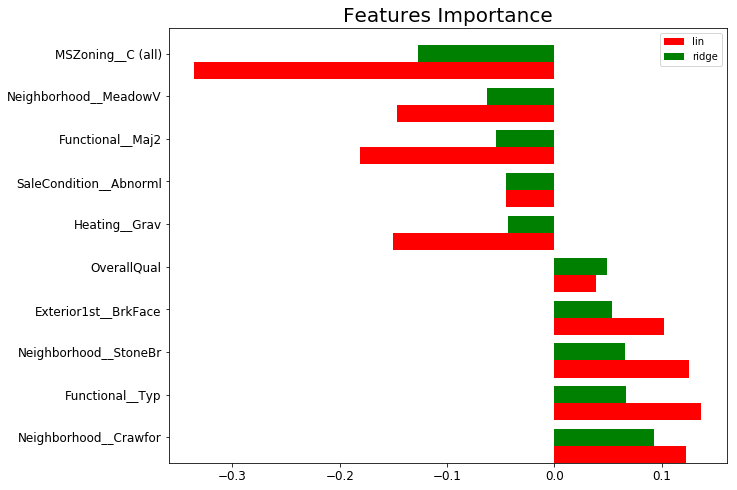

In [22]:

bar_feature = pd.concat([sort_features.head(),sort_features.tail()])

width = 0.4
ind = np.arange(len(bar_feature['Theta_lin']))

fig, ax = plt.subplots(figsize=(10,8))
ax.barh(ind,bar_feature['Theta_lin'],width, color='red', label='lin')
ax.barh(width+ind,bar_feature['Theta_ridge'],width, color='green', label='ridge')

ax.set(yticks=ind + width, yticklabels=bar_feature['Features'], ylim=[2*width - 1, len(bar_feature)])
ax.legend()
plt.title("Features Importance",size=20)
plt.show()


We notice some neighborhoods has significant impact on house price : MeadowV seems to be low graded as coefficient is negative and StoneBr, Crawfor are high graded

The Exterior1st BrkFace and Overall quality are signifiant features for improving value of a house

The Zoning C seems to be the worst feature for valulating House Price

In [23]:
# Now let's run the regression with the most important features as shown in above bar chart

#We re-take housing data
housing_prepared = full_pipeline.fit_transform(housing)
xtrain = housing_prepared[:samples]

# Let's collect those features in a list
important_features = bar_feature['Features']

# Let's take the best param of the linear model previously calculated with random search
lin_params = joblib.load('lin_params.pkl')


# Let's select the best feature using the Transformer DataFrameSelector
selector = DataFrameSelector(important_features)

xtrain_top10 = selector.transform(DataFrame(xtrain_no_outliers,columns = feature_name))

lin_model = LinearRegression(lin_params).fit(xtrain_no_outliers, y_no_outliers)
lin_pred = lin_model.predict(xtrain_no_outliers)
lin_scores = cross_val_score(lin_model, xtrain_no_outliers, y_no_outliers, scoring="neg_mean_squared_error", cv=10)
print( "lin rmse(mean, std): (%lf, %lf) " % (np.sqrt(-lin_scores.mean()), np.sqrt(lin_scores.std())))
print( "lin training rmse: ", np.sqrt(mean_squared_error(y_no_outliers, lin_pred)))

print(np.sqrt(-lin_scores))

lin rmse(mean, std): (0.122099, 0.059388) 
lin training rmse:  0.09042591148122198
[0.1270597  0.11296896 0.12305786 0.14089124 0.14334692 0.11759611
 0.12171087 0.09501428 0.10077019 0.1296527 ]


### 2) Now let's see what feature PCA gives us

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

pca.fit(xtrain_no_outliers)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
xtrain_pc = pca.transform(xtrain_no_outliers)

ridge_model = Ridge(**grid_search.best_params_)


final_scores = cross_val_score(ridge_model, xtrain_pc, y_no_outliers, scoring="neg_mean_squared_error", cv=10)

#test = np.delete(xtrain_pc, np.s_[4::], 1)
ridge_model.fit(xtrain_pc,y_no_outliers)
final_pred = ridge_model.predict(xtrain_pc)

print ("rmse(mean, std): (%lf, %lf)" % (np.sqrt(-final_scores.mean()), np.sqrt(final_scores.std())))
print ("training rmse: ", np.sqrt(mean_squared_error(y_no_outliers, final_pred)))
print ("cv rmse: ",np.sqrt(-final_scores))

rmse(mean, std): (0.231881, 0.084754)
training rmse:  0.23068739201112282
cv rmse:  [0.24082555 0.20172858 0.24450178 0.24192007 0.25174091 0.20739052
 0.23878158 0.21746241 0.23117638 0.23781828]


In [33]:
df_pca = DataFrame(np.c_[xtrain_pc,y_no_outliers])

'Done'

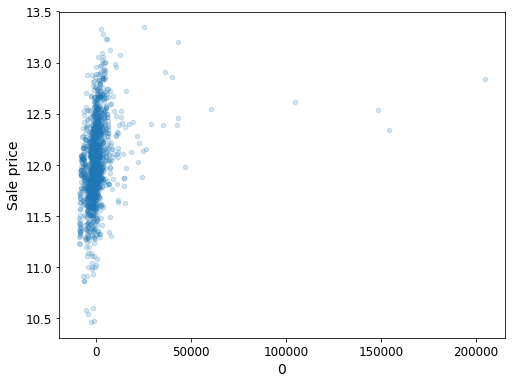

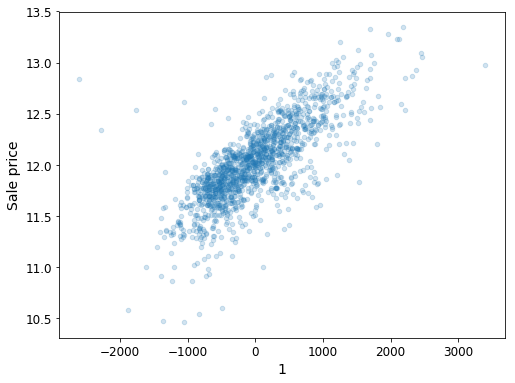

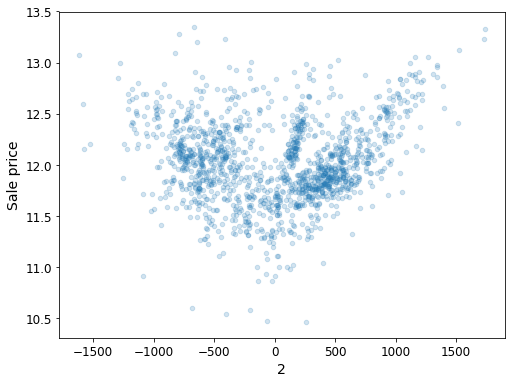

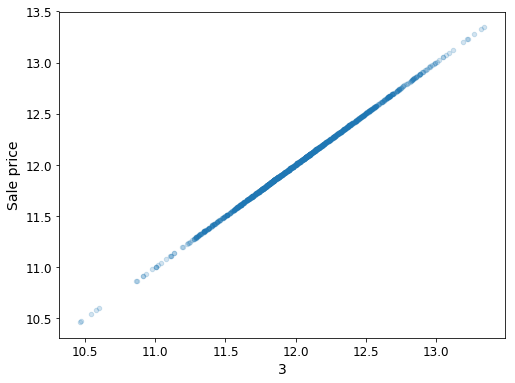

In [27]:
def scatter_pc(df):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    cols = df.columns.tolist()
    ## Loop over the columns and create the scatter plots
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            ## first compute a lowess fit to the data

            ## Now make the plots
            fig = plt.figure(figsize=(8, 6))
            fig.clf()
            ax = fig.gca()
            df.plot(kind = 'scatter', x = col, y = len(df.columns)-1, ax = ax, alpha = 0.2)
            ax.set_xlabel(col)
            ax.set_ylabel('Sale price')
            #ax.set_title('Sale Price vs. ' + col)    
    return 'Done'
scatter_pc(df_pca)

# G.  Improve Tree model with Adaboost

1) Boosted Trees

Will try the adaboost alogrithm the improve Decision Tree previously defined in section B

In [28]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

param_distribs = {
        #'base_estimator': ['DecisionTreeRegressor'],
        'n_estimators': [20, 50, 100],
        'learning_rate': [0.5, 1],
        'loss': ['linear'],
    }

# We load previous decision trees parameters
tree_params = joblib.load("decision_tree.pkl")
Ada_tree_reg = AdaBoostRegressor(tree_params)

# We need to redefine xtrain for each model to be the training set from preparation pipeline
housing_prepared = full_pipeline.fit_transform(housing)
xtrain = housing_prepared[:samples]


grid_search = GridSearchCV(Ada_tree_reg, param_distribs, cv=10, scoring="neg_mean_squared_error")
grid_search.fit(xtrain, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 50, 100], 'learning_rate': [0.5, 1], 'loss': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
from sklearn.externals import joblib
joblib.dump(grid_search.best_params_, 'boosted_params.pkl')

boosted_params = joblib.load("boosted_params.pkl")
decision_tree = joblib.load("decision_tree.pkl")

boosted_params['base_estimator'] = decision_tree

In [30]:
from sklearn.ensemble import AdaBoostRegressor

boosted_params = joblib.load("boosted_params.pkl")
Ada_tree_reg = AdaBoostRegressor(**boosted_params)
Ada_tree_reg.fit(xtrain_no_outliers,y_no_outliers)
predict = Ada_tree_reg.predict(xtrain_no_outliers)

#display_scores and best parameters

def display_scores_params(scores):
    print("Scores:", scores)
    print("Mean:", np.sqrt(-grid_search.cv_results_['mean_test_score']).mean())
    print("Standard deviation:", scores.std())
    print("Best params:", grid_search.best_params_)
    

negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)

final_scores = cross_val_score(Ada_tree_reg, xtrain_no_outliers, y_no_outliers, scoring="neg_mean_squared_error", cv=10)

print ("cv rmse: ",np.sqrt(-final_scores))
display_scores_params(rmse)

cv rmse:  [0.17416156 0.17695623 0.16194378 0.16764496 0.18663181 0.15614422
 0.1682887  0.16232188 0.17619266 0.17250247]
Scores: 0.15478116559972652
Mean: 0.15793325241377548
Standard deviation: 0.0
Best params: {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 100}


In [31]:
# Let's vizualise the last tree from the final boosted predictors
Ada_tree_reg.estimators_[Ada_tree_reg.n_estimators-1]

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=679635595, splitter='best')

In [32]:
# Let's vizualise our Tree
from sklearn.tree import export_graphviz


export_graphviz(
    Ada_tree_reg.estimators_[Ada_tree_reg.n_estimators-1],
    out_file=r"C:\Users\BQUIDET\IPython Notebooks\Kaggle\House Pricing\Boosted_Tree.dot",
    feature_names=feature_name,
    #class_names=feature_name,
    rounded=True,
    filled=True
)

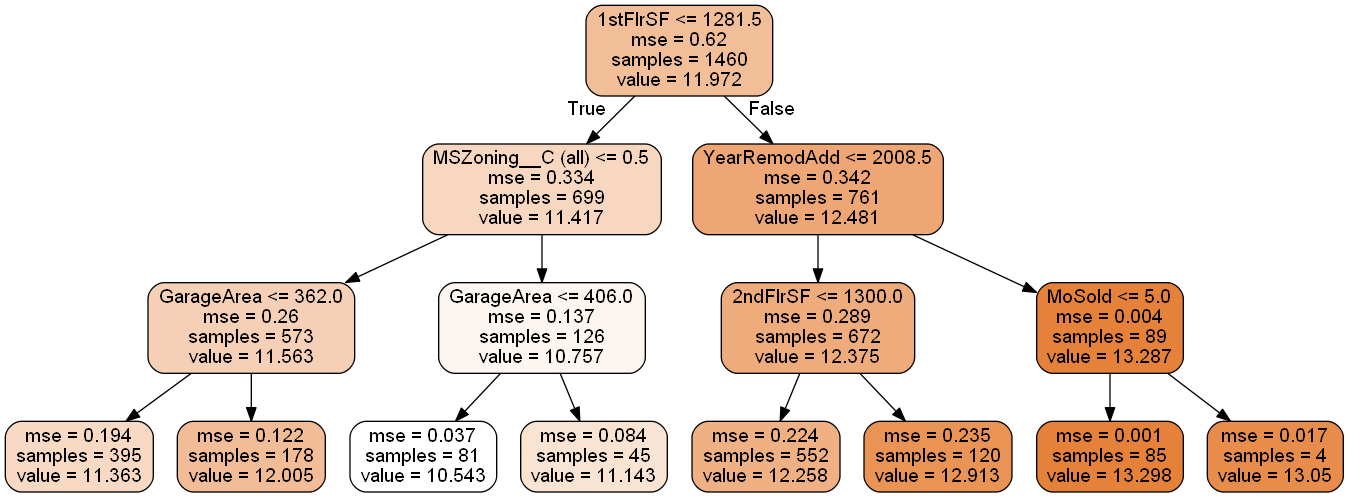

In [3]:
from IPython.display import Image
Image(filename = r"C:\Users\BQUIDET\IPython Notebooks\Kaggle\House Pricing\Boosted_Tree.png", width=10000, height=1000000)


=> This is the last tree of Boosted tree algorith. After the algorithm will apply Coordinate descent on exponential loss for the 100 trees created

 => From the initial decision tree, we can observe that some feature takes much more importance at the top of the tree splits. As the result of weight improvement on the predictors. We see for example that the 1st Floor surface has taken much more importance along the improvements of different trees and lift the ladders of the tree to the top node. There is a strange node with the Month during which the sale was sold. It seems that it helps predicting final node of the most expensive houses.
 
 => The featue : Remodel year is appearing in the final boosted tree and is a very interesting feature to take into account. 
 
 => We can see that we don't improve the score model, nor by getting the outliers out of the sample.
 Ridge regression with alpha = 12 seems to be the best model to predict House price !  We will use it to submit the prediction of the test sample and give the result.

# H. Prepare submission file with test sample

In [107]:
# Let's take the best param of the ridge model previously calculated with random search
ridge_model = joblib.load('ridge_no_outliers.pkl')

#fit the best model found
ridge_model.fit(xtrain_no_outliers, y_no_outliers)

# transform test set with pipeline as previously defined
train_no_outliers = train[train['GrLivArea']<4000]
xtest = test.drop([index_col], axis=1)
y_no_outliers = np.log1p(train_no_outliers[label_col])
train_no_outliers = train_no_outliers.drop([index_col, label_col], axis=1)
samples_no_outliers = xtrain_no_outliers.shape[0] 
housing_no_outliers = pd.concat([train_no_outliers, xtest])
housing_no_outliers_prepared = full_pipeline.fit_transform(housing_no_outliers)
xtest = housing_no_outliers_prepared[samples_no_outliers:]


kaggle_pred = ridge_model.predict(xtest)

results = pd.DataFrame({
    "Id" : test["Id"],
    "SalePrice" : np.expm1(kaggle_pred),
})

# print results["SalePrice"]
results.to_csv("results.csv", index=False)

### Comments and conclusion:


After trying different models, we end up choosing a simple linear regression model, with a ridge parameters for determining the best parameters. We found that dealing with outliers was the most efficient way to improve model accuracy. We also concluded that 5 features made 99% of the total variance, and from 79 different only 5 really matter in model performance.

More complicated models such as boosted tree gave disappointing results. 


 There is a lot of improvement to make to the notebook, especially in :
 
 - Automatize the tuning process in the pipeline with gridsearch. I encountered an issue when encoding the 
 categorical features, as I couldn't use gridsearch inside a pipeline. 
 If you have a solution for that, I beg you to reply to that conversatin in sciikit learn : https://stackoverflow.com/questions/47924363/labelencoder-in-sklearn-pandas-mapper-with-pipeline-after-cross-val-score-return/50021924#50021924
 
 
 - Find a better solution for collecting the feature_name from the pipeline and after the encoding of categorical features. I tried to create a method for the CategoricalEncoder class get_feature_name but I need to finish it.
 
 
 - Improve the methods of the class for Normalization, filling missing value ( use KNN for example ) and outliers detection. 
 
 
 - For outliers I faced problems when implementing the method inside a class in the pipeline. Because the Class is within the pipeline , so when transforming the dataset, it must also delete some points which show errors on the model fitted at a later stage of the pipeline. So it has to fit the model twice within the pipeline, which doesn't make sense when we want to have simple and fast code.
  We also need to measure 2 characteristics of the outliers : Do they have high leverage and high influence ? 
  If the Hat matrice is SDP, we can use Cook theory and calculate the high leverage points. Then we can sort those points and see those who have high influence. After we can decide.
  If the Hat matrice is inversible, then we have to calculate the models without each points and calculate what is the impact when including them. It can be very heavy and difficult to automatize.
 